# Restr{ology}

## A Neighborhood Recommender for Upcoming Eateries & Restaurants

### Week 2 - Part 1: Notebook  Code

This part of the assignment will cover all the code required to make Restrology functional and will be written and executed in this Notebook.

### <font color=green>Table of Contents</font>
 - <font color=green>0: Prerequisites</font>
 - <font color=green>1: Download & Explore Datasets</font>
 - <font color=green>2: Explore Neighborhoods in all 5 Boroughs</font>
 - <font color=green>3: Analyze Each Neighborhood of Each Borough</font>
 - <font color=green>4: Clustering</font>
 - <font color=green>5: Examining Clusters</font>
 - <font color=green>6: Plotting outcomes for Restrology Report</font>

## 0. Prerequisites

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


We would also be needing a couple of packages for our project. Namely, Geocoders and Folium for the purpose of converting an address into latitude and longitude values and the latter for plotting geospatial data.
 - Geocoders: A package that converts a give address into Latitude and Longitude values
 - Folium: A very useful package for plotting Geospatial data

In [2]:
!conda install -c conda-forge geopy --yes



Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\arjun\Anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.49-py_0
  geopy              conda-forge/noarch::geopy-1.20.0-py_0




geopy-1.20.0         | 57 KB     |            |   0% 
geopy-1.20.0         | 57 KB     | ##         |  21% 
geopy-1.20.0         | 57 KB     | #######5   |  75% 
geopy-1.20.0         | 57 KB     | ########## | 100% 

geographiclib-1.49   | 32 K

In [2]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes 


Solving environment: ...working... done

# All requested packages already installed.



In [3]:
import folium # map rendering library

## 1. Download and Explore Dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

We will be using the same dataset we used for a lab in week 3 in this course. Here is the link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572. For convenience, the files are already downloaded and placed on the server, so you can simply run a `wget` command and access the data. So let's go ahead and do that.

#### Load and explore the data

In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Now, let quickly explore the dataset

In [6]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

If we observe closely towards the top of the output of the new york data, we can see that all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [5]:
neighborhoods_data = newyork_data['features']

Let's look at the first item in the list.

In [8]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a pandas dataframe

The next task is essentially transforming this data of nested Python dictionaries into a pandas dataframe. So let's start by creating an empty dataframe.

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Now, let's loop through the data and fill the dataframe one row at a time.

In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Get the latitude and longitude values of New York City.

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [12]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Segment the neighborhoods of all 5 Boroughs

Now, from here we will simplify the above map and segment and cluster neighborhoods of one borough at a time. There are 5 boroughs in New York; *Brooklyn*, *Manhattan*, *Queens*, *Bronx* and *Staten Island*. We will segment and cluster neighborhoods of all 5 boroughs, starting with Brooklyn. So let's slice the original dataframe and create a new dataframe of the *Brooklyn* data.

#### Brooklyn Data

In [13]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


Let's get the geographical coordinates of Brooklyn.

In [14]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


Let's visualize Brooklyn and all the neighborhoods in it.

In [15]:
# create map of Brooklyn using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

#### Manhattan Data

In [16]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.

In [17]:
# using Google to get the lat & long coordinates of Manhattan
latitude2 = 40.7900869
longitude2 = -73.9598295
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude2, longitude2))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


Let's visualize Manhattan and all the neighborhoods in it.

In [18]:
# create map of Manhattan using latitude2 and longitude2 values
map_manhattan = folium.Map(location=[latitude2, longitude2], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

#### Queens Data

In [19]:
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


Let's get the geographical coordinates of Queens.

In [20]:
# using Google to get the lat & long coordinates of Queens
latitude3 = 40.7282
longitude3 = -73.7949
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude3, longitude3))

The geograpical coordinate of Queens are 40.7282, -73.7949.


Let's visualize Queens and all the neighborhoods in it.

In [21]:
# create map of Queens using latitude3 and longitude3 values
map_queens = folium.Map(location=[latitude3, longitude3], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

#### Bronx Data

In [22]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Let's get the geographical coordinates of Bronx.

In [23]:
# using Google to get the lat & long coordinates of Bronx
latitude4 = 40.8448
longitude4 = -73.8648
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude4, longitude4))

The geograpical coordinate of Bronx are 40.8448, -73.8648.


Let's visualize Bronx and all the neighborhoods in it.

In [24]:
# create map of Bronx using latitude4 and longitude4 values
map_bronx = folium.Map(location=[latitude4, longitude4], zoom_start=11)

# add markers to map
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

#### Staten Island Data

In [25]:
staten_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
staten_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


Let's get the geographical coordinates of Staten Island.

In [26]:
# using Google to get the lat & long coordinates of Staten Island
latitude5 = 40.5795
longitude5 = -74.1502
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude5, longitude5))

The geograpical coordinate of Staten Island are 40.5795, -74.1502.


Let's visualize Staten Island and all the neighborhoods in it.

In [27]:
# create map of Staten  Island using latitude5 and longitude5 values
map_staten = folium.Map(location=[latitude5, longitude5], zoom_start=11)

# add markers to map
for lat, lng, label in zip(staten_data['Latitude'], staten_data['Longitude'], staten_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_staten)  
    
map_staten

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

### Define Foursquare Credentials and Version

In [28]:
CLIENT_ID = 'CPASOOY1KMCZKKSQQUBE0GKMRUSP5JZUQK50T3Z03V4IS2IO' # your Foursquare ID
CLIENT_SECRET = 'UTUOMX4ASKLR0XBRG2XEDDSQSKU1A1RRVKGQZINMGFJPHO24' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


### Let's explore all our  5 dataframes.
 - brooklyn_data
 - manhattan_data
 - queens_data
 - bronx_data
 - staten_data

#### Let's explore the first neighborhood in our Brooklyn dataframe.

In [29]:
brooklyn_data.loc[0, 'Neighborhood']

'Bay Ridge'

Get the neighborhood's latitude and longitude values.

In [30]:
neighborhood_latitude = brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


#### Now, let's get the top 100 venues that are in Bay Ridge within a radius of 500 meters.

First, let's create the GET request URL.

In [31]:
# limit of number of venues returned by Foursquare API
LIMIT = 100

# define radius
radius = 500

# URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, LIMIT)

url


'https://api.foursquare.com/v2/venues/explore?&client_id=CPASOOY1KMCZKKSQQUBE0GKMRUSP5JZUQK50T3Z03V4IS2IO&client_secret=UTUOMX4ASKLR0XBRG2XEDDSQSKU1A1RRVKGQZINMGFJPHO24&v=20180605&ll=40.625801065010656,-74.03062069353813&radius=500&limit=100'

Send the GET request and examine the resutls

In [32]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d0792680d2be7002c02f0dd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Bay Ridge',
  'headerFullLocation': 'Bay Ridge, Brooklyn',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 85,
  'suggestedBounds': {'ne': {'lat': 40.63030106951066,
    'lng': -74.02470273356597},
   'sw': {'lat': 40.62130106051065, 'lng': -74.03653865351028}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b895827f964a5206c2d32e3',
       'name': 'Pilo Arts Day Spa and Salon',
       'location': {'address': '8412 3rd Ave',
        'lat': 40.62474788273414,
        'lng': -74.03059056940135,
        'labeledLatL

We know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab in Week 2 of this Capstone course.

In [33]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [34]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Pilo Arts Day Spa and Salon,Spa,40.624748,-74.030591
1,Bagel Boy,Bagel Shop,40.627896,-74.029335
2,Cocoa Grinder,Juice Bar,40.623967,-74.030863
3,Pegasus Cafe,Breakfast Spot,40.623168,-74.031186
4,Ho' Brah Taco Joint,Taco Place,40.622960,-74.031371


In [35]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

85 venues were returned by Foursquare.


#### Let's explore the first neighborhood in our Manhattan dataframe.

In [36]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

Get the neighborhood's latitude and longitude values.

In [37]:
neighborhood_latitude2 = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude2 = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name2 = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name2, 
                                                               neighborhood_latitude2, 
                                                               neighborhood_longitude2))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

First, let's create the GET request URL

In [38]:
# limit of number of venues returned by Foursquare API
LIMIT = 100

# define radius
radius = 500

# URL
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude2, neighborhood_longitude2, radius, LIMIT)

url2


'https://api.foursquare.com/v2/venues/explore?&client_id=CPASOOY1KMCZKKSQQUBE0GKMRUSP5JZUQK50T3Z03V4IS2IO&client_secret=UTUOMX4ASKLR0XBRG2XEDDSQSKU1A1RRVKGQZINMGFJPHO24&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

Send the GET request and examine the resutls

In [39]:
results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5d07929a342adf00303038ef'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 26,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

We know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab in Week 2 of this Capstone course.

In [40]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [41]:
venues2 = results2['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns2]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

nearby_venues2.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Dunkin',Donut Shop,40.877136,-73.906666


In [42]:
print('{} venues were returned by Foursquare.'.format(nearby_venues2.shape[0]))

26 venues were returned by Foursquare.


#### Let's explore the first neighborhood in our Queens dataframe.

In [43]:
queens_data.loc[0, 'Neighborhood']

'Astoria'

Get the neighborhood's latitude and longitude values.

In [44]:
neighborhood_latitude3 = queens_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude3 = queens_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name3 = queens_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name3, 
                                                               neighborhood_latitude3, 
                                                               neighborhood_longitude3))

Latitude and longitude values of Astoria are 40.76850859335492, -73.91565374304234.


#### Now, let's get the top 100 venues that are in Astoria within a radius of 500 meters.

First, let's create the GET request URL

In [45]:
# limit of number of venues returned by Foursquare API
LIMIT = 100

# define radius
radius = 500

# URL
url3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude3, neighborhood_longitude3, radius, LIMIT)

url3


'https://api.foursquare.com/v2/venues/explore?&client_id=CPASOOY1KMCZKKSQQUBE0GKMRUSP5JZUQK50T3Z03V4IS2IO&client_secret=UTUOMX4ASKLR0XBRG2XEDDSQSKU1A1RRVKGQZINMGFJPHO24&v=20180605&ll=40.76850859335492,-73.91565374304234&radius=500&limit=100'

Send the GET request and examine the resutls

In [46]:
results3 = requests.get(url3).json()
results3

{'meta': {'code': 200, 'requestId': '5d0792b0351e3d1ffa5133fa'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Astoria',
  'headerFullLocation': 'Astoria, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 107,
  'suggestedBounds': {'ne': {'lat': 40.773008597854925,
    'lng': -73.90972309237958},
   'sw': {'lat': 40.76400858885492, 'lng': -73.9215843937051}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bdf502a89ca76b062b75d5e',
       'name': 'Favela Grill',
       'location': {'address': '33-18 28th Ave',
        'crossStreet': 'btwn 33rd & 34th St.',
        'lat': 40.76734843380796,
        'lng': -73.9178974

We know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab in Week 2 of this Capstone course.

In [47]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [48]:
venues3 = results3['response']['groups'][0]['items']
    
nearby_venues3 = json_normalize(venues3) # flatten JSON

# filter columns
filtered_columns3 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues3 =nearby_venues3.loc[:, filtered_columns3]

# filter the category for each row
nearby_venues3['venue.categories'] = nearby_venues3.apply(get_category_type, axis=1)

# clean columns
nearby_venues3.columns = [col.split(".")[-1] for col in nearby_venues3.columns]

nearby_venues3.head()

,name,categories,lat,lng
0,Favela Grill,Brazilian Restaurant,40.767348,-73.917897
1,Orange Blossom,Gourmet Shop,40.769856,-73.917012
2,CrossFit Queens,Gym,40.769404,-73.918977
3,Titan Foods Inc.,Gourmet Shop,40.769198,-73.919253
4,Off The Hook,Seafood Restaurant,40.767200,-73.918104


In [49]:
print('{} venues were returned by Foursquare.'.format(nearby_venues3.shape[0]))

100 venues were returned by Foursquare.


#### Let's explore the first neighborhood in our Bronx dataframe.

In [50]:
bronx_data.loc[0, 'Neighborhood']

'Wakefield'

Get the neighborhood's latitude and longitude values.

In [51]:
neighborhood_latitude4 = bronx_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude4 = bronx_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name4 = bronx_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name4, 
                                                               neighborhood_latitude4, 
                                                               neighborhood_longitude4))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


#### Now, let's get the top 100 venues that are in Wakefield within a radius of 500 meters.

First, let's create the GET request URL

In [52]:
# limit of number of venues returned by Foursquare API
LIMIT = 100

# define radius
radius = 500

# URL
url4 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude4, neighborhood_longitude4, radius, LIMIT)

url4


'https://api.foursquare.com/v2/venues/explore?&client_id=CPASOOY1KMCZKKSQQUBE0GKMRUSP5JZUQK50T3Z03V4IS2IO&client_secret=UTUOMX4ASKLR0XBRG2XEDDSQSKU1A1RRVKGQZINMGFJPHO24&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

Send the GET request and examine the resutls

In [53]:
results4 = requests.get(url4).json()
results4

{'meta': {'code': 200, 'requestId': '5d0792c923bb8e0038427cf6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLn

We know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab in Week 2 of this Capstone course.

In [54]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [55]:
venues4 = results4['response']['groups'][0]['items']
    
nearby_venues4 = json_normalize(venues4) # flatten JSON

# filter columns
filtered_columns4 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues4 =nearby_venues4.loc[:, filtered_columns4]

# filter the category for each row
nearby_venues4['venue.categories'] = nearby_venues4.apply(get_category_type, axis=1)

# clean columns
nearby_venues4.columns = [col.split(".")[-1] for col in nearby_venues4.columns]

nearby_venues4.head()

,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Rite Aid,Pharmacy,40.896649,-73.844846
2,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
3,Cooler Runnings Jamaican Restaurant Inc,Caribbean Restaurant,40.898276,-73.850381
4,Shell,Gas Station,40.894187,-73.845862


In [56]:
print('{} venues were returned by Foursquare.'.format(nearby_venues4.shape[0]))

9 venues were returned by Foursquare.


#### Let's explore the first neighborhood in our Staten Island dataframe.

In [57]:
staten_data.loc[0, 'Neighborhood']

'St. George'

Get the neighborhood's latitude and longitude values.

In [58]:
neighborhood_latitude5 = staten_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude5 = staten_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name5 = staten_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name5, 
                                                               neighborhood_latitude5, 
                                                               neighborhood_longitude5))

Latitude and longitude values of St. George are 40.6449815710044, -74.07935312512797.


#### Now, let's get the top 100 venues that are in St. George within a radius of 500 meters.

First, let's create the GET request URL

In [59]:
# limit of number of venues returned by Foursquare API
LIMIT = 100

# define radius
radius = 500

# URL
url5 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude5, neighborhood_longitude5, radius, LIMIT)

url5

'https://api.foursquare.com/v2/venues/explore?&client_id=CPASOOY1KMCZKKSQQUBE0GKMRUSP5JZUQK50T3Z03V4IS2IO&client_secret=UTUOMX4ASKLR0XBRG2XEDDSQSKU1A1RRVKGQZINMGFJPHO24&v=20180605&ll=40.6449815710044,-74.07935312512797&radius=500&limit=100'

Send the GET request and examine the resutls

In [60]:
results5 = requests.get(url5).json()
results5

{'meta': {'code': 200, 'requestId': '5d0792dca121dc0025f2d22a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 40.6494815755044,
    'lng': -74.07343346476772},
   'sw': {'lat': 40.6404815665044, 'lng': -74.08527278548821}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a214841f964a520cd7c1fe3',
       'name': 'Beso',
       'location': {'address': '11 Schuyler St',
        'crossStreet': 'btwn Richmond Terrace & Stuyvesant Pl',
        'lat': 40.64330638739738,
        'lng': 

We know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab in Week 2 of this Capstone course.

In [61]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [62]:
venues5 = results5['response']['groups'][0]['items']
    
nearby_venues5 = json_normalize(venues5) # flatten JSON

# filter columns
filtered_columns5 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues5 =nearby_venues5.loc[:, filtered_columns5]

# filter the category for each row
nearby_venues5['venue.categories'] = nearby_venues5.apply(get_category_type, axis=1)

# clean columns
nearby_venues5.columns = [col.split(".")[-1] for col in nearby_venues5.columns]

nearby_venues5.head()

,name,categories,lat,lng
0,Beso,Tapas Restaurant,40.643306,-74.076508
1,Staten Island September 11 Memorial,Monument / Landmark,40.646767,-74.076510
2,A&S Pizzeria,Pizza Place,40.643940,-74.077626
3,Richmond County Bank Ballpark,Baseball Stadium,40.645056,-74.076864
4,St. George Theatre,Theater,40.642253,-74.077496


In [63]:
print('{} venues were returned by Foursquare.'.format(nearby_venues5.shape[0]))

24 venues were returned by Foursquare.


## 2. Explore Neighborhoods in all 5 Boroughs

#### Let's create a function to repeat the same process to all the neighborhoods in all of the 5 Boroughs
 - Brooklyn
 - Manhattan
 - Queens
 - Bronx
 - Staten Island

#### Complete Neighborhoods: Brooklyn

In [64]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *brooklyn_venues*.

In [65]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


#### Let's check the size of the resulting dataframe

In [66]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2834, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


Let's check how many venues were returned for each neighborhood

In [67]:
brooklyn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,47,47,47,47,47,47
Bay Ridge,85,85,85,85,85,85
Bedford Stuyvesant,30,30,30,30,30,30
Bensonhurst,37,37,37,37,37,37
Bergen Beach,6,6,6,6,6,6
Boerum Hill,92,92,92,92,92,92
Borough Park,20,20,20,20,20,20
Brighton Beach,42,42,42,42,42,42
Broadway Junction,16,16,16,16,16,16


#### Let's find out how many unique categories can be curated from all the returned venues

In [68]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 288 uniques categories.


#### Complete Neighborhoods: Manhattan

Borrowing the getNearbyVenues() function from earlier.

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [69]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


#### Let's check the size of the resulting dataframe

In [70]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3331, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


Let's check how many venues were returned for each neighborhood

In [71]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,100,100,100,100,100,100
Carnegie Hill,100,100,100,100,100,100
Central Harlem,47,47,47,47,47,47
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,44,44,44,44,44,44
East Village,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [72]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 332 uniques categories.


#### Complete Neighborhoods: Queens

Borrowing the getNearbyVenues() function from earlier.

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *queens_venues*.

In [73]:
queens_venues = getNearbyVenues(names=queens_data['Neighborhood'],
                                   latitudes=queens_data['Latitude'],
                                   longitudes=queens_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


#### Let's check the size of the resulting dataframe

In [74]:
print(queens_venues.shape)
queens_venues.head()

(2149, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
3,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant


Let's check how many venues were returned for each neighborhood

In [75]:
queens_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,17,17,17,17,17,17
Astoria,100,100,100,100,100,100
Astoria Heights,14,14,14,14,14,14
Auburndale,21,21,21,21,21,21
Bay Terrace,41,41,41,41,41,41
Bayside,71,71,71,71,71,71
Bayswater,3,3,3,3,3,3
Beechhurst,18,18,18,18,18,18
Bellaire,11,11,11,11,11,11


#### Let's find out how many unique categories can be curated from all the returned venues

In [76]:
print('There are {} uniques categories.'.format(len(queens_venues['Venue Category'].unique())))

There are 261 uniques categories.


#### Complete Neighborhoods: Bronx

Borrowing the getNearbyVenues() function from earlier.

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *bronx_venues*.

In [77]:
bronx_venues = getNearbyVenues(names=bronx_data['Neighborhood'],
                                   latitudes=bronx_data['Latitude'],
                                   longitudes=bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


#### Let's check the size of the resulting dataframe

In [78]:
print(bronx_venues.shape)
bronx_venues.head()

(1261, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898276,-73.850381,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,Shell,40.894187,-73.845862,Gas Station


Let's check how many venues were returned for each neighborhood

In [79]:
bronx_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,31,31,31,31,31,31
Baychester,22,22,22,22,22,22
Bedford Park,38,38,38,38,38,38
Belmont,96,96,96,96,96,96
Bronxdale,17,17,17,17,17,17
Castle Hill,9,9,9,9,9,9
City Island,23,23,23,23,23,23
Claremont Village,13,13,13,13,13,13
Clason Point,11,11,11,11,11,11


#### Let's find out how many unique categories can be curated from all the returned venues

In [80]:
print('There are {} uniques categories.'.format(len(bronx_venues['Venue Category'].unique())))

There are 173 uniques categories.


#### Complete Neighborhoods: Staten Island

Borrowing the getNearbyVenues() function from earlier.

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *staten_venues*.

In [81]:
staten_venues = getNearbyVenues(names=staten_data['Neighborhood'],
                                   latitudes=staten_data['Latitude'],
                                   longitudes=staten_data['Longitude']
                                  )

St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


#### Let's check the size of the resulting dataframe

In [82]:
print(staten_venues.shape)
staten_venues.head()

(811, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.644982,-74.079353,Beso,40.643306,-74.076508,Tapas Restaurant
1,St. George,40.644982,-74.079353,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
2,St. George,40.644982,-74.079353,A&S Pizzeria,40.643940,-74.077626,Pizza Place
3,St. George,40.644982,-74.079353,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium
4,St. George,40.644982,-74.079353,St. George Theatre,40.642253,-74.077496,Theater


Let's check how many venues were returned for each neighborhood

In [83]:
staten_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Annadale,9,9,9,9,9,9
Arden Heights,4,4,4,4,4,4
Arlington,6,6,6,6,6,6
Arrochar,20,20,20,20,20,20
Bay Terrace,11,11,11,11,11,11
Bloomfield,5,5,5,5,5,5
Bulls Head,46,46,46,46,46,46
Butler Manor,6,6,6,6,6,6
Castleton Corners,15,15,15,15,15,15


#### Let's find out how many unique categories can be curated from all the returned venues

In [84]:
print('There are {} uniques categories.'.format(len(staten_venues['Venue Category'].unique())))

There are 176 uniques categories.


## 3. Analyze Each Neighborhood of Each Borough

We will analuze each neighborhood of each borough (Brooklyn, Manhattan, Queens, Bronx and Staten Island) and the final product of this stage would be a Data Frmae which top 10 most common Ratautant/Eatry type in each neighborhood which would be repeated for each of 5 boroughs.

 - #### Brooklyn

In [85]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column

fixed_columns = [brooklyn_onehot.columns[183]] + list(brooklyn_onehot.columns[:183]) + list(brooklyn_onehot.columns[184:])                                                                    
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Neighborhood,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vid

And let's examine the new dataframe size.

In [86]:
brooklyn_onehot.shape

(2834, 288)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [87]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped.head()

,Neighborhood,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vid

### Manually Selecting (Subsetting) Related Features for the Restaurants/Eatries

In [88]:
# this list  is created manually
# selecting only features or categories which are restaurant/eateries
restrology_features = ['Neighborhood', 'American Restaurant', 'Arepa Restaurant', 'Argentinian Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bagel Shop',
                       'Bakery', 'Bistro', 'Breakfast Spot', 'Bubble Tea Shop', 'Buffet', 'Burger Joint',
                       'Burrito Place', 'Café', 'Cajun / Creole Restaurant', 'Cantonese Restaurant',
                       'Caribbean Restaurant', 'Caucasian Restaurant', 'Chinese Restaurant', 'Coffee Shop',
                       'Creperie', 'Cuban Restaurant', 'Deli / Bodega', 'Dessert Shop', 'Dim Sum Restaurant', 
                       'Diner', 'Donut Shop', 'Dumpling Restaurant', 'Eastern European Restaurant', 'Ethiopian Restaurant', 
                       'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'Fish & Chips Shop', 'Food', 
                       'Food & Drink Shop', 'Food Court', 'Food Stand', 'Food Truck', 'French Restaurant', 
                       'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Gastropub', 'German Restaurant', 'Gourmet Shop', 
                       'Greek Restaurant', 'Halal Restaurant', 'Hawaiian Restaurant', 'Health Food Store', 'Hot Dog Joint', 
                       'Hotpot Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Israeli Restaurant', 'Italian Restaurant', 
                       'Japanese Restaurant', 'Jewish Restaurant', 'Juice Bar', 'Kebab Restaurant', 'Korean Restaurant', 
                       'Latin American Restaurant', 'Lebanese Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 
                       'Middle Eastern Restaurant', 'New American Restaurant', 'Noodle House', 'Pakistani Restaurant', 
                       'Peruvian Restaurant', 'Pie Shop', 'Pizza Place', 'Polish Restaurant', 'Ramen Restaurant', 'Restaurant', 
                       'Russian Restaurant', 'Salad Place', 'Sandwich Place', 'Seafood Restaurant', 'Shabu-Shabu Restaurant', 
                       'Shanghai Restaurant', 'Snack Place', 'South American Restaurant', 'Southern / Soul Food Restaurant', 
                       'Spanish Restaurant', 'Steakhouse', 'Sushi Restaurant', 'Taco Place', 'Taiwanese Restaurant', 
                       'Tapas Restaurant', 'Tea Room', 'Thai Restaurant', 'Tibetan Restaurant', 'Turkish Restaurant', 
                       'Varenyky restaurant', 'Vegetarian / Vegan Restaurant', 'Vietnamese Restaurant', 'Wings Joint']

#### Updating the One-hot Encoded DataFrame

In [89]:
brooklyn_grouped = brooklyn_grouped[restrology_features]

In [90]:
brooklyn_grouped.head()

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Coffee Shop,Creperie,Cuban Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gastropub,German Restaurant,Gourmet Shop,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Health Food Store,Hot Dog Joint,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Noodle House,Pakistani Restaurant,Peruvian Restaurant,Pie Shop,Pizza Place,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Bath Beach,0.000000,0.0,0.0,0.000000,0.000000,0.021277,0.021277,0.0,0.000000,0.042553,0.0,0.021277,0.0,0.021277,0.0,0.021277,0.0,0.000000,0.042553,0.021277,0.0,0.0,0.021277,0.021277,0.000000,0.021277,0.021277,0.000000,0.0,0.0,0.0,0.042553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.021277,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.021277,0.000000,0.0,0.042553,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.021277,0.000000,0.000000,0.021277,0.021277,0.0,0.042553,0.0,0.0,0.021277,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.042553,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.021277,0.0,0.0,0.000000,0.0
1,Bay Ridge,0.035294,0.0,0.0,0.000000,0.000000,0.035294,0.000000,0.0,0.011765,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.011765,0.023529,0.011765,0.0,0.0,0.000000,0.000000,0.011765,0.011765,0.011765,0.000000,0.0,0.0,0.0,0.011765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.047059,0.0,0.0,0.0,0.0,0.000000,0.023529,0.011765,0.0,0.058824,0.000000,0.0,0.011765,0.0,0.0,0.0,0.0,0.0,0.011765,0.011765,0.011765,0.000000,0.000000,0.000000,0.0,0.047059,0.0,0.0,0.000000,0.000000,0.0,0.023529,0.023529,0.000000,0.0,0.011765,0.0,0.0,0.0,0.0,0.023529,0.011765,0.0,0.0,0.011765,0.023529,0.0,0.000000,0.0,0.0,0.011765,0.0
2,Bedford Stuyvesant,0.000000,0.0,0.0,0.000000,0.033333,0.033333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.066667,0.0,0.000000,0.0,0.000000,0.000000,0.066667,0.0,0.0,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.0,0.066667,0.0,0.0,0.000000,0.000000,0.0,0.033333,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.033333,0.0
3,Bensonhurst,0.027027,0.0,0.0,0.027027,0.000000,0.027027,0.027027,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.108108,0.027027,0.0,0.0,0.000000,0.027027,0.000000,0.000000,0.054054,0.027027,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.027027,0.054054,0.000000,0.0,0.027027,0.000000,0.0,0.000000,0.0,0.0,0.0,0

#### Let's confirm the new size

In [91]:
brooklyn_grouped.shape

(70, 98)

#### Let's print each neighborhood along with the top 5 most common venues

In [130]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                  venue  freq
0    Italian Restaurant  0.04
1      Sushi Restaurant  0.04
2       Bubble Tea Shop  0.04
3  Fast Food Restaurant  0.04
4    Chinese Restaurant  0.04


----Bay Ridge----
                 venue  freq
0   Italian Restaurant  0.06
1     Greek Restaurant  0.05
2          Pizza Place  0.05
3           Bagel Shop  0.04
4  American Restaurant  0.04


----Bedford Stuyvesant----
            venue  freq
0   Deli / Bodega  0.13
1            Café  0.07
2     Coffee Shop  0.07
3     Pizza Place  0.07
4  Sandwich Place  0.03


----Bensonhurst----
                venue  freq
0  Chinese Restaurant  0.11
1          Donut Shop  0.05
2    Sushi Restaurant  0.05
3      Ice Cream Shop  0.05
4         Pizza Place  0.05


----Bergen Beach----
               venue  freq
0         Donut Shop  0.17
1   Ramen Restaurant  0.00
2  Polish Restaurant  0.00
3        Pizza Place  0.00
4           Pie Shop  0.00


----Boerum Hill----
                       venue  freq
0 

            venue  freq
0     Pizza Place  0.29
1  Ice Cream Shop  0.07
2       BBQ Joint  0.07
3      Bagel Shop  0.07
4          Bakery  0.07


----Mill Basin----
                 venue  freq
0          Pizza Place  0.10
1  Japanese Restaurant  0.08
2   Chinese Restaurant  0.08
3           Bagel Shop  0.05
4   Italian Restaurant  0.05


----Mill Island----
                 venue  freq
0  American Restaurant   0.0
1        Hot Dog Joint   0.0
2    Polish Restaurant   0.0
3          Pizza Place   0.0
4             Pie Shop   0.0


----New Lots----
                  venue  freq
0           Pizza Place  0.15
1  Fast Food Restaurant  0.10
2      Asian Restaurant  0.05
3        Breakfast Spot  0.05
4    Chinese Restaurant  0.05


----North Side----
                           venue  freq
0                    Coffee Shop  0.06
1            American Restaurant  0.04
2  Vegetarian / Vegan Restaurant  0.03
3                    Pizza Place  0.03
4              French Restaurant  0.03


----Ocean

#### Extracting Top 10 Restaurant/Eatry from 1 Neighborhood in Brooklyn for our Restrology Report

In [214]:
venues_num = 10
df_bk = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == 'Brooklyn Heights'].T.reset_index()
df_bk.columns = ['venue','freq']
df_bk = df_bk.iloc[1:]
df_bk['freq'] = df_bk['freq'].astype(float)
df_bk = df_bk.round({'freq': 2})
df_bk['freq'] = df_bk['freq'] * 100
top_bk = pd.DataFrame(df_bk.sort_values('freq', ascending=False).reset_index(drop=True).head(venues_num))

In [231]:
top_bk = top_bk.set_index('venue')

In [232]:
top_bk

,freq
venue,
Pizza Place,4.0
Deli / Bodega,4.0
Italian Restaurant,3.0
American Restaurant,2.0
Diner,2.0
Sushi Restaurant,2.0
Mexican Restaurant,2.0
Ice Cream Shop,2.0
Indian Restaurant,2.0


#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [92]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [93]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Pizza Place,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Bubble Tea Shop,Chinese Restaurant,Donut Shop,Diner,Middle Eastern Restaurant,Dessert Shop
1,Bay Ridge,Italian Restaurant,Pizza Place,Greek Restaurant,Bagel Shop,American Restaurant,Ice Cream Shop,Thai Restaurant,Sandwich Place,Seafood Restaurant,Chinese Restaurant
2,Bedford Stuyvesant,Deli / Bodega,Café,Pizza Place,Coffee Shop,Japanese Restaurant,Gourmet Shop,Sandwich Place,Juice Bar,New American Restaurant,Bagel Shop
3,Bensonhurst,Chinese Restaurant,Pizza Place,Ice Cream Shop,Donut Shop,Sushi Restaurant,Shabu-Shabu Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Italian Restaurant,Dumpling Restaurant
4,Bergen Beach,Donut Shop,Wings Joint,Hawaiian Restaurant,Diner,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


This Dataset is Ready for any Machine Learning Algorithm. Before that we have to do the same efor our remaining 4 Boroughs.

 - #### Manhattan

In [94]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Ski Shop,Smoke Shop,Snack P

And let's examine the new dataframe size.

In [95]:
manhattan_onehot.shape

(3331, 333)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [96]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Ski Shop,Smoke Shop,Snack P

### Manually Selecting (Subsetting) Related Features for the Restaurants/Eatries

In [97]:
# this list  is created manually
# selecting only features or categories which are restaurant/eateries
restrology_features2 = ['Neighborhood', 'Afghan Restaurant', 'African Restaurant', 'American Restaurant', 'Arepa Restaurant', 'Argentinian Restaurant',
                        'Argentinian Restaurant', 'Asian Restaurant', 'Australian Restaurant', 'Austrian Restaurant', 'BBQ Joint', 'Bagel Shop',
                        'Bakery', 'Bistro', 'Brazilian Restaurant', 'Breakfast Spot', 'Bubble Tea Shop', 'Burger Joint',
                        'Burrito Place', 'Cafeteria', 'Café', 'Cambodian Restaurant', 'Cantonese Restaurant',
                        'Caribbean Restaurant', 'Caucasian Restaurant', 'Chinese Restaurant', 'Coffee Shop',
                        'Creperie', 'Cuban Restaurant', 'Cupcake Shop', 'Czech Restaurant', 'Deli / Bodega', 'Dessert Shop', 'Dim Sum Restaurant', 
                        'Diner', 'Donut Shop', 'Dumpling Restaurant', 'Eastern European Restaurant', 'Empanada Restaurant', 'English Restaurant', 'Ethiopian Restaurant', 
                        'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'Food & Drink Shop', 'Food Court', 'Food Stand', 'Food Truck', 'French Restaurant', 
                        'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Gastropub', 'German Restaurant', 'Gourmet Shop', 
                        'Greek Restaurant', 'Hawaiian Restaurant', 'Health Food Store', 'Himalayan Restaurant', 'Hot Dog Joint', 
                        'Hotpot Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Israeli Restaurant', 'Italian Restaurant', 
                        'Japanese Curry Restaurant', 'Japanese Restaurant', 'Jewish Restaurant', 'Juice Bar', 'Kebab Restaurant', 'Korean Restaurant', 
                        'Kosher Restaurant', 'Latin American Restaurant', 'Lebanese Restaurant', 'Malay Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 
                        'Middle Eastern Restaurant', 'Modern European Restaurant', 'Molecular Gastronomy Restaurant', 'Moroccan Restaurant', 'New American Restaurant',
                        'Noodle House', 'North Indian Restaurant', 'Paella Restaurant', 'Pakistani Restaurant', 'Pastry Shop', 'Persian Restaurant', 'Peruvian Restaurant',
                        'Pie Shop', 'Pizza Place', 'Ramen Restaurant', 'Restaurant', 'Russian Restaurant', 'Salad Place', 'Sandwich Place', 'Scandinavian Restaurant',
                        'Seafood Restaurant', 'Shanghai Restaurant', 'Snack Place', 'Soba Restaurant', 'Soup Place', 'South American Restaurant', 'South Indian Restaurant',
                        'Southern / Soul Food Restaurant', 'Spanish Restaurant', 'Steakhouse', 'Sushi Restaurant', 'Swiss Restaurant', 'Szechuan Restaurant', 'Taco Place',
                        'Taiwanese Restaurant', 'Tapas Restaurant', 'Tea Room', 'Thai Restaurant', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant', 'Venezuelan Restaurant', 
                        'Vietnamese Restaurant', 'Wings Joint']

#### Updating the One-hot Encoded DataFrame

In [98]:
manhattan_grouped = manhattan_grouped[restrology_features2]

In [99]:
manhattan_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Cafeteria,Café,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Coffee Shop,Creperie,Cuban Restaurant,Cupcake Shop,Czech Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gastropub,German Restaurant,Gourmet Shop,Greek Restaurant,Hawaiian Restaurant,Health Food Store,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Pastry Shop,Persian Restaurant,Peruvian Restaurant,Pie Shop,Pizza Place,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Snack Place,Soba Restaurant,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wings Joint
0,Battery Park City,0.0,0.00000,0.010000,0.0,0.0,0.0,0.00,0.0,0.00,0.020000,0.000000,0.010000,0.01,0.0,0.00,0.00,0.02,0.01,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.010000,0.07,0.00,0.0,0.02,0.0,0.0,0.000000,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.02,0.0,0.01,0.000000,0.000000,0.0,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.00,0.00,0.02,0.00,0.00,0.03,0.0,0.00,0.0,0.010000,0.0,0.00,0.00,0.0,0.0,0.00,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.020000,0.00,0.00,0.0,0.01,0.02,0.0,0.010000,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.01,0.01,0.0,0.0,0.00,0.0,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.0
1,Carnegie Hill,0.0,0.00000,0.010000,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.010000,0.020000,0.00,0.0,0.01,0.00,0.01,0.00,0.000000,0.040000,0.0,0.00,0.000000,0.0,0.010000,0.06,0.00,0.0,0.00,0.0,0.0,0.000000,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.030000,0.000000,0.0,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.01,0.00,0.01,0.02,0.00,0.02,0.0,0.03,0.0,0.000000,0.0,0.00,0.01,0.0,0.0,0.00,0.01,0.02,0.0,0.0,0.0,0.0,0.01,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.060000,0.01,0.01,0.0,0.01,0.00,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.00,0.01,0.0,0.0,0.01,0.0,0.000000,0.00,0.01,0.0,0.01,0.0,0.02,0.0
2,Central Harlem,0.0,0.06383,0.042553,0.0,0.0,0.0,0.00,0.0,0.00,0.021277,0.021277,0.021277,0.00,0.0,0.00,0.00,0.00,0.00,0.021277,0.021277,0.0,0.00,0.021277,0.0,0.042553,0.00,0.00,0.0,0.00,0.0,0.0,0.021277,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.021277,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.042553,0.021277,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.021277,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.021277,0.00,0.00,0.0,0.00,0.00,0.0,0.042553,0.00,0.00,0.0,0.0,0.0,0.0,0.021277,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.021277,0.00,0.00,0.0,0.00,0.0,0.00,0.0
3,Chelsea,0.0,0.00000,0.030000,0.0,0

#### Let's confirm the new size

In [100]:
manhattan_grouped.shape

(40, 119)

#### Let's print each neighborhood along with the top 5 most common venues

In [101]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                venue  freq
0         Coffee Shop  0.07
1  Italian Restaurant  0.03
2      Ice Cream Shop  0.02
3         Pizza Place  0.02
4        Burger Joint  0.02


----Carnegie Hill----
                 venue  freq
0          Pizza Place  0.06
1          Coffee Shop  0.06
2                 Café  0.04
3    French Restaurant  0.03
4  Japanese Restaurant  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.06
1   Seafood Restaurant  0.04
2  American Restaurant  0.04
3    French Restaurant  0.04
4   Chinese Restaurant  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1      Ice Cream Shop  0.05
2  Italian Restaurant  0.05
3              Bakery  0.04
4  Seafood Restaurant  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.08
1  American Restaurant  0.04
2      Bubble Tea Shop  0.03
3  Dumpling Restaurant  0.03
4       Ice Cream Shop  0.03


----Civic Center----
      

#### Extracting Top 10 Restaurant/Eatry from 1 Neighborhood in Manhattan for our Restrology Report

In [216]:
venues_num = 10
df_mn = manhattan_grouped[manhattan_grouped['Neighborhood'] == 'Chelsea'].T.reset_index()
df_mn.columns = ['venue','freq']
df_mn = df_mn.iloc[1:]
df_mn['freq'] = df_mn['freq'].astype(float)
df_mn = df_mn.round({'freq': 2})
df_mn['freq'] = df_mn['freq'] * 100
top_mn = pd.DataFrame(df_mn.sort_values('freq', ascending=False).reset_index(drop=True).head(venues_num))

In [233]:
top_mn = top_mn.set_index('venue')

In [234]:
top_mn

,freq
venue,
Coffee Shop,6.0
Ice Cream Shop,5.0
Italian Restaurant,5.0
Bakery,4.0
Seafood Restaurant,3.0
American Restaurant,3.0
Tapas Restaurant,2.0
French Restaurant,2.0
Cupcake Shop,2.0


#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [102]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [103]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted2 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted2['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted2.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted2.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Coffee Shop,Italian Restaurant,BBQ Joint,Cupcake Shop,Pizza Place,Sandwich Place,Food Court,Burger Joint,Ice Cream Shop,Food Truck
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Japanese Restaurant,French Restaurant,Italian Restaurant,Mexican Restaurant,Bakery,Indian Restaurant,Vietnamese Restaurant
2,Central Harlem,African Restaurant,American Restaurant,Seafood Restaurant,Chinese Restaurant,French Restaurant,Dessert Shop,Bakery,Café,Cafeteria,Pizza Place
3,Chelsea,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bakery,American Restaurant,Seafood Restaurant,Cupcake Shop,French Restaurant,Tapas Restaurant,Sandwich Place
4,Chinatown,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Ice Cream Shop,Dumpling Restaurant,Bubble Tea Shop,Bakery,Korean Restaurant,Dim Sum Restaurant,Malay Restaurant


 - #### Queens

In [104]:
# one hot encoding
queens_onehot = pd.get_dummies(queens_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
queens_onehot['Neighborhood'] = queens_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [queens_onehot.columns[170]] + list(queens_onehot.columns[:170]) + list(queens_onehot.columns[171:])
queens_onehot = queens_onehot[fixed_columns]

queens_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

And let's examine the new dataframe size.

In [105]:
queens_onehot.shape

(2149, 261)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [106]:
queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()
queens_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Arverne,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.058824,0.

### Manually Selecting (Subsetting) Related Features for the Restaurants/Eatries

In [108]:
# this list  is created manually
# selecting only features or categories which are restaurant/eateries
restrology_features3 = ['Neighborhood', 'Afghan Restaurant', 'American Restaurant', 'Arepa Restaurant',
                        'Argentinian Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bagel Shop',
                        'Bakery', 'Bistro', 'Brazilian Restaurant', 'Breakfast Spot', 'Bubble Tea Shop', 'Buffet', 'Burger Joint',
                        'Burrito Place', 'Cafeteria', 'Café', 'Cajun / Creole Restaurant', 'Cantonese Restaurant',
                        'Caribbean Restaurant', 'Chinese Restaurant', 'Coffee Shop', 'Colombian Restaurant', 'Comfort Food Restaurant', 
                        'Creperie', 'Cuban Restaurant', 'Deli / Bodega', 'Dessert Shop', 'Dim Sum Restaurant', 
                        'Diner', 'Donut Shop', 'Dumpling Restaurant', 'Eastern European Restaurant', 'Egyptian Restaurant', 'Empanada Restaurant', 
                        'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'Fish & Chips Shop', 'Food & Drink Shop', 'Food Court', 'Food Truck', 'French Restaurant', 
                        'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Gastropub', 'German Restaurant', 'Gluten-free Restaurant', 'Gourmet Shop', 
                        'Greek Restaurant', 'Halal Restaurant', 'Himalayan Restaurant', 'Hot Dog Joint', 
                        'Hotpot Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Italian Restaurant', 
                        'Japanese Restaurant', 'Juice Bar', 'Korean Restaurant', 
                        'Kosher Restaurant', 'Latin American Restaurant', 'Malay Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 
                        'Middle Eastern Restaurant', 'New American Restaurant',
                        'Noodle House', 'Peruvian Restaurant',
                        'Pizza Place', 'Polish Restaurant', 'Ramen Restaurant', 'Restaurant', 'Romanian Restaurant', 'Salad Place', 'Sandwich Place', 
                        'Seafood Restaurant', 'Shanghai Restaurant', 'Snack Place', 'South American Restaurant', 
                        'Southern / Soul Food Restaurant', 'Spanish Restaurant', 'Steakhouse', 'Sushi Restaurant', 'Szechuan Restaurant', 'Taco Place',
                        'Taiwanese Restaurant', 'Tapas Restaurant', 'Tea Room', 'Thai Restaurant', 'Tibetan Restaurant', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant',  
                        'Vietnamese Restaurant']

#### Updating the One-hot Encoded DataFrame

In [110]:
queens_grouped = queens_grouped[restrology_features3]

In [111]:
queens_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gastropub,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Noodle House,Peruvian Restaurant,Pizza Place,Polish Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Arverne,0.0,0.000000,0.0,0.0,0.00000,0.00,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.058824,0.0,0.00,0.00,0.0,0.000000,0.00,0.0,0.00,0.058824,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00000,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.058824,0.0,0.0,0.0,0.0,0.00,0.058824,0.00,0.0,0.0,0.0,0.0,0.0,0.00000,0.00,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.00,0.0
1,Astoria,0.0,0.000000,0.0,0.0,0.00000,0.01,0.01,0.040000,0.0,0.01,0.0,0.01,0.0,0.010000,0.0,0.0,0.02,0.01,0.0,0.0,0.01,0.020000,0.0,0.01,0.01,0.0,0.020000,0.01,0.0,0.01,0.000000,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,0.0,0.02,0.0,0.02,0.0,0.0,0.01,0.0,0.0,0.00000,0.02,0.05,0.0,0.0,0.0,0.0,0.020000,0.02,0.030000,0.01,0.01,0.010000,0.0,0.02,0.0,0.02,0.01,0.07,0.0,0.000000,0.0,0.020000,0.0,0.0,0.0,0.0,0.01,0.010000,0.04,0.0,0.0,0.0,0.0,0.0,0.00000,0.01,0.0,0.0,0.0,0.0,0.0,0.010000,0.0,0.0,0.01,0.0
2,Astoria Heights,0.0,0.000000,0.0,0.0,0.00000,0.00,0.00,0.071429,0.0,0.00,0.0,0.00,0.0,0.071429,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.00,0.0,0.071429,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00000,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.142857,0.00,0.00,0.000000,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.071429,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.00000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0
3,Auburndale,0.0,0.047619,0.0,0.0,0.00000,0.00,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.00,0.0,0.047619,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00,0.047619,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00000,0.00,0.00,0.0,0.0,0.0,0.0,0.047619,0.00,0.095238,0.00,0.00,0.047619,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.047619,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.00000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0
4,Bay Terrace,0.0,0.048780,0.0,0.0,0.02439,0.00,0.00,0.024390,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.024390,0.0,0.00,0.00,0.0,0.024390,0.00,0.0,0.00,0.048780,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.02439,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.0

#### Let's confirm the new size

In [112]:
queens_grouped.shape

(81, 95)

#### Let's print each neighborhood along with the top 5 most common venues

In [113]:
num_top_venues = 5

for hood in queens_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = queens_grouped[queens_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arverne----
             venue  freq
0      Coffee Shop  0.06
1  Thai Restaurant  0.06
2       Donut Shop  0.06
3   Sandwich Place  0.06
4      Pizza Place  0.06


----Astoria----
                       venue  freq
0  Middle Eastern Restaurant  0.07
1           Greek Restaurant  0.05
2         Seafood Restaurant  0.04
3                     Bakery  0.04
4         Italian Restaurant  0.03


----Astoria Heights----
                venue  freq
0  Italian Restaurant  0.14
1       Deli / Bodega  0.07
2         Pizza Place  0.07
3              Bakery  0.07
4        Burger Joint  0.07


----Auburndale----
                 venue  freq
0   Italian Restaurant  0.10
1  American Restaurant  0.05
2       Ice Cream Shop  0.05
3        Deli / Bodega  0.05
4         Noodle House  0.05


----Bay Terrace----
                    venue  freq
0     American Restaurant  0.05
1              Donut Shop  0.05
2  Gluten-free Restaurant  0.02
3                  Bakery  0.02
4             Pizza Place  0.02


-

4   Peruvian Restaurant  0.00


----Lefrak City----
                venue  freq
0              Bakery  0.07
1          Restaurant  0.04
2  Mexican Restaurant  0.04
3          Steakhouse  0.04
4     Bubble Tea Shop  0.04


----Lindenwood----
                 venue  freq
0        Deli / Bodega   0.1
1          Pizza Place   0.1
2           Donut Shop   0.1
3               Bakery   0.1
4  Japanese Restaurant   0.1


----Little Neck----
                venue  freq
0   Korean Restaurant  0.08
1       Deli / Bodega  0.06
2  Italian Restaurant  0.06
3  Chinese Restaurant  0.06
4              Bakery  0.04


----Long Island City----
                venue  freq
0         Coffee Shop  0.11
1  Mexican Restaurant  0.05
2                Café  0.05
3         Pizza Place  0.05
4          Restaurant  0.03


----Malba----
                     venue  freq
0        Afghan Restaurant   0.0
1        Korean Restaurant   0.0
2      Peruvian Restaurant   0.0
3             Noodle House   0.0
4  New American Res

#### Extracting Top 10 Restaurant/Eatry from 1 Neighborhood in Queens for our Restrology Report

In [218]:
venues_num = 10
df_qu = queens_grouped[queens_grouped['Neighborhood'] == 'Elmhurst'].T.reset_index()
df_qu.columns = ['venue','freq']
df_qu = df_qu.iloc[1:]
df_qu['freq'] = df_qu['freq'].astype(float)
df_qu = df_qu.round({'freq': 2})
df_qu['freq'] = df_qu['freq'] * 100
top_qu = pd.DataFrame(df_qu.sort_values('freq', ascending=False).reset_index(drop=True).head(venues_num))

In [235]:
top_qu = top_qu.set_index('venue')

In [236]:
top_qu

,freq
venue,
Thai Restaurant,18.0
Mexican Restaurant,15.0
Chinese Restaurant,8.0
Vietnamese Restaurant,5.0
Bubble Tea Shop,5.0
South American Restaurant,5.0
Colombian Restaurant,3.0
Snack Place,3.0
Malay Restaurant,3.0


#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [114]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [115]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted3 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted3['Neighborhood'] = queens_grouped['Neighborhood']

for ind in np.arange(queens_grouped.shape[0]):
    neighborhoods_venues_sorted3.iloc[ind, 1:] = return_most_common_venues(queens_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted3.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Pizza Place,Thai Restaurant,Sandwich Place,Donut Shop,Coffee Shop,Dumpling Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega
1,Astoria,Middle Eastern Restaurant,Greek Restaurant,Seafood Restaurant,Bakery,Italian Restaurant,Gourmet Shop,Café,Deli / Bodega,Mediterranean Restaurant,Coffee Shop
2,Astoria Heights,Italian Restaurant,Bakery,Deli / Bodega,Burger Joint,Pizza Place,Food Court,Food & Drink Shop,Cuban Restaurant,Fried Chicken Joint,Dessert Shop
3,Auburndale,Italian Restaurant,Noodle House,American Restaurant,Deli / Bodega,Fast Food Restaurant,Ice Cream Shop,Korean Restaurant,Eastern European Restaurant,Cuban Restaurant,Dessert Shop
4,Bay Terrace,American Restaurant,Donut Shop,Pizza Place,Gluten-free Restaurant,Deli / Bodega,Asian Restaurant,Coffee Shop,Bakery,Steakhouse,Egyptian Restaurant


 - #### Bronx

In [120]:
# one hot encoding
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]

bronx_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Venue,Nail Salon,Nightclub,Office,Optical Shop,Outdoor Sculpture,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Rental Car Location,Restaurant,River,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Social Club,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wings Joint,Women's Store
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

And let's examine the new dataframe size.

In [132]:
bronx_onehot.shape

(1261, 174)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [122]:
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
bronx_grouped.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Venue,Nail Salon,Nightclub,Office,Optical Shop,Outdoor Sculpture,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Rental Car Location,Restaurant,River,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Social Club,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wings Joint,Women's Store
0,Allerton,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.032258,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.032258,0.0,0.0,0.000000,0.0,0.0,0.032258,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.064516,0.0,0.000000,0.0,0.0,0.0,0.000000,0.032258,0.0,0.0,0.064516,0.032258,0.032258,0.000000,0.032258,0.0,0.0,0.032258,0.000000,0.000000,0.032258,0.0,0.0,0.032258,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.032258,0.0,0.0,0.032258,0.0,0.000000,0.0,0.032258,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.032258,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.032258,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.064516,0.000000,0.129032,0.0,0.032258,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.064516,0.032258,0.0,0.0,0.0,0.0,0.0,0.064516,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Baychester,0.0,0.0,0.045455,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.000000,0.045455,0.000000,0.045455,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.000000,0.0,0.0,0.045455,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.045455,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.045455,0.0,0.0,0.045455,0.000000,0.000000,0.045455,0.0,0.0,0.045455,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.045455,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.045455

### Manually Selecting (Subsetting) Related Features for the Restaurants/Eatries

In [123]:
# this list  is created manually
# selecting only features or categories which are restaurant/eateries
restrology_features4 = ['Neighborhood', 'African Restaurant', 'American Restaurant', 'Arepa Restaurant',
                        'Asian Restaurant', 'BBQ Joint', 'Bagel Shop',
                        'Bakery', 'Breakfast Spot', 'Buffet', 'Burger Joint',
                        'Burrito Place', 'Café',
                        'Caribbean Restaurant', 'Chinese Restaurant', 'Coffee Shop', 'Comfort Food Restaurant', 
                        'Cupcake Shop', 'Deli / Bodega', 'Dessert Shop', 
                        'Diner', 'Donut Shop', 'Eastern European Restaurant',
                        'Fast Food Restaurant', 'Fish & Chips Shop', 'Food & Drink Shop', 'Food Truck', 'French Restaurant', 
                        'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Gourmet Shop', 
                        'Greek Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Italian Restaurant', 
                        'Japanese Restaurant', 'Juice Bar',  
                        'Latin American Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 
                        'Middle Eastern Restaurant', 'Paella Restaurant', 'Peruvian Restaurant',
                        'Pizza Place', 'Restaurant', 'Sandwich Place', 
                        'Seafood Restaurant', 'South American Restaurant', 
                        'Spanish Restaurant', 'Sushi Restaurant', 
                        'Thai Restaurant', 'Vietnamese Restaurant', 'Wings Joint']

#### Updating the One-hot Encoded DataFrame

In [124]:
bronx_grouped = bronx_grouped[restrology_features4]

In [125]:
bronx_grouped.head()

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gourmet Shop,Greek Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant,Wings Joint
0,Allerton,0.0,0.000000,0.0,0.0,0.000000,0.0,0.032258,0.032258,0.0,0.000000,0.0,0.000000,0.0,0.064516,0.000000,0.0,0.0,0.064516,0.032258,0.000000,0.032258,0.000000,0.032258,0.0,0.000000,0.000000,0.0,0.032258,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.129032,0.0,0.000000,0.0,0.0,0.032258,0.0,0.0,0.0,0.000000
1,Baychester,0.0,0.045455,0.0,0.0,0.045455,0.0,0.000000,0.045455,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.045455,0.000000,0.045455,0.0,0.000000,0.000000,0.0,0.045455,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.045455,0.000000,0.0,0.0,0.045455,0.0,0.045455,0.0,0.0,0.045455,0.0,0.0,0.0,0.000000
2,Bedford Park,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.026316,0.0,0.000000,0.0,0.078947,0.000000,0.0,0.0,0.078947,0.000000,0.105263,0.026316,0.000000,0.000000,0.0,0.000000,0.026316,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.052632,0.000000,0.0,0.0,0.078947,0.0,0.052632,0.0,0.0,0.026316,0.0,0.0,0.0,0.000000
3,Belmont,0.0,0.010417,0.0,0.0,0.000000,0.0,0.052083,0.000000,0.0,0.000000,0.0,0.010417,0.0,0.010417,0.010417,0.0,0.0,0.093750,0.031250,0.010417,0.020833,0.000000,0.010417,0.0,0.020833,0.000000,0.0,0.000000,0.0,0.010417,0.0,0.010417,0.0,0.187500,0.010417,0.0,0.0,0.010417,0.020833,0.000000,0.0,0.0,0.093750,0.0,0.020833,0.0,0.0,0.031250,0.0,0.0,0.0,0.010417
4,Bronxdale,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.058824,0.0,0.000000,0.0,0.000000,0.0,0.058824,0.000000,0.0,0.0,0.058824,0.000000,0.000000,0.000000,0.058824,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.117647,0.000000,0.0,0.0,0.000000,0.058824,0.058824,0.0,0.0,0.058824,0.0,0.000000,0.0,0.0,0.058824,0.0,0.0,0.0,0.000000


#### Let's confirm the new size

In [126]:
bronx_grouped.shape

(52, 53)

#### Let's print each neighborhood along with the top 5 most common venues

In [127]:
num_top_venues = 5

for hood in bronx_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bronx_grouped[bronx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                 venue  freq
0          Pizza Place  0.13
1        Deli / Bodega  0.06
2   Chinese Restaurant  0.06
3  Fried Chicken Joint  0.03
4           Donut Shop  0.03


----Baychester----
                 venue  freq
0   Mexican Restaurant  0.05
1          Pizza Place  0.05
2  Fried Chicken Joint  0.05
3  American Restaurant  0.05
4            BBQ Joint  0.05


----Bedford Park----
                venue  freq
0               Diner  0.11
1       Deli / Bodega  0.08
2  Chinese Restaurant  0.08
3         Pizza Place  0.08
4      Sandwich Place  0.05


----Belmont----
                venue  freq
0  Italian Restaurant  0.19
1         Pizza Place  0.09
2       Deli / Bodega  0.09
3              Bakery  0.05
4        Dessert Shop  0.03


----Bronxdale----
                       venue  freq
0         Italian Restaurant  0.12
1         Mexican Restaurant  0.06
2                Pizza Place  0.06
3  Middle Eastern Restaurant  0.06
4         Chinese Restaurant  0.06


----C

                       venue  freq
0         Chinese Restaurant  0.12
1         Spanish Restaurant  0.06
2             Breakfast Spot  0.06
3  Latin American Restaurant  0.06
4        Fried Chicken Joint  0.06


----Spuyten Duyvil----
                venue  freq
0     Thai Restaurant  0.09
1  African Restaurant  0.00
2  Mexican Restaurant  0.00
3  Frozen Yogurt Shop  0.00
4        Gourmet Shop  0.00


----Throgs Neck----
                 venue  freq
0        Deli / Bodega  0.18
1          Coffee Shop  0.09
2  American Restaurant  0.09
3     Asian Restaurant  0.09
4   Italian Restaurant  0.09


----Unionport----
                       venue  freq
0                 Donut Shop  0.10
1  Latin American Restaurant  0.10
2                  Juice Bar  0.05
3                Pizza Place  0.05
4                      Diner  0.05


----University Heights----
                venue  freq
0         Pizza Place  0.12
1              Bakery  0.08
2  African Restaurant  0.04
3  Chinese Restaurant  0.04
4 

#### Extracting Top 10 Restaurant/Eatry from 1 Neighborhood in Bronx for our Restrology Report

In [220]:
venues_num = 10
df_bx = bronx_grouped[bronx_grouped['Neighborhood'] == 'Belmont'].T.reset_index()
df_bx.columns = ['venue','freq']
df_bx = df_bx.iloc[1:]
df_bx['freq'] = df_bx['freq'].astype(float)
df_bx = df_bx.round({'freq': 2})
df_bx['freq'] = df_bx['freq'] * 100
top_bx = pd.DataFrame(df_bx.sort_values('freq', ascending=False).reset_index(drop=True).head(venues_num))

In [237]:
top_bx = top_bx.set_index('venue')

In [238]:
top_bx

,freq
venue,
Italian Restaurant,19.0
Pizza Place,9.0
Deli / Bodega,9.0
Bakery,5.0
Dessert Shop,3.0
Spanish Restaurant,3.0
Sandwich Place,2.0
Donut Shop,2.0
Mexican Restaurant,2.0


#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [128]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [129]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted4 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted4['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_venues_sorted4.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted4.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Chinese Restaurant,Deli / Bodega,Fast Food Restaurant,Fried Chicken Joint,Spanish Restaurant,Donut Shop,Dessert Shop,Bakery,Breakfast Spot
1,Baychester,Pizza Place,Mexican Restaurant,American Restaurant,Donut Shop,Spanish Restaurant,BBQ Joint,Sandwich Place,Fried Chicken Joint,Fast Food Restaurant,Breakfast Spot
2,Bedford Park,Diner,Pizza Place,Deli / Bodega,Chinese Restaurant,Mexican Restaurant,Sandwich Place,Food Truck,Donut Shop,Burger Joint,Spanish Restaurant
3,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Dessert Shop,Spanish Restaurant,Mexican Restaurant,Donut Shop,Sandwich Place,Food & Drink Shop
4,Bronxdale,Italian Restaurant,Eastern European Restaurant,Spanish Restaurant,Deli / Bodega,Pizza Place,Breakfast Spot,Middle Eastern Restaurant,Mexican Restaurant,Chinese Restaurant,Caribbean Restaurant


 - #### Staten Island

In [131]:
# one hot encoding
staten_onehot = pd.get_dummies(staten_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
staten_onehot['Neighborhood'] = staten_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [staten_onehot.columns[-1]] + list(staten_onehot.columns[:-1])
staten_onehot = staten_onehot[fixed_columns]

staten_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Liquor Store,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightlife Spot,Optical Shop,Other Repair Shop,Outdoors & Recreation,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoothie Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store
0,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,St. George,0,0,0,0,0,0

And let's examine the new dataframe size.

In [133]:
staten_onehot.shape

(811, 177)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [134]:
staten_grouped = staten_onehot.groupby('Neighborhood').mean().reset_index()
staten_grouped.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Liquor Store,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightlife Spot,Optical Shop,Other Repair Shop,Outdoors & Recreation,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoothie Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store
0,Annadale,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.111111,0.0,0.0,0.111111,0.0,0.222222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0
1,Arden Heights,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.250000,0.0,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000

### Manually Selecting (Subsetting) Related Features for the Restaurants/Eatries

In [135]:
# this list  is created manually
# selecting only features or categories which are restaurant/eateries
restrology_features5 = ['Neighborhood', 'American Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bagel Shop',
                        'Bakery', 'Breakfast Spot', 'Burger Joint',
                        'Cafeteria', 'Café', 'Cajun / Creole Restaurant',
                        'Caribbean Restaurant', 'Chinese Restaurant', 'Coffee Shop',  
                        'Deli / Bodega', 'Dessert Shop', 'Dim Sum Restaurant', 
                        'Diner', 'Donut Shop', 'Eastern European Restaurant', 
                        'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'Food & Drink Shop', 'Food Truck', 'French Restaurant', 
                        'Gastropub', 'German Restaurant', 'Gourmet Shop', 'Greek Restaurant',  
                        'Ice Cream Shop', 'Indian Restaurant', 'Italian Restaurant', 
                        'Japanese Restaurant', 'Juice Bar',  
                        'Mediterranean Restaurant', 'Mexican Restaurant', 
                        'Middle Eastern Restaurant', 'New American Restaurant',
                        'Peruvian Restaurant', 'Pizza Place', 'Restaurant', 'Sandwich Place', 
                        'Smoothie Shop', 'Snack Place',  
                        'Spanish Restaurant', 'Sri Lankan Restaurant', 'Steakhouse', 'Sushi Restaurant', 'Taco Place',
                        'Tapas Restaurant', 'Thai Restaurant', 'Vegetarian / Vegan Restaurant',  
                        'Vietnamese Restaurant', 'Wings Joint']

#### Updating the One-hot Encoded DataFrame

In [137]:
staten_grouped = staten_grouped[restrology_features5]

In [138]:
staten_grouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Burger Joint,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food & Drink Shop,Food Truck,French Restaurant,Gastropub,German Restaurant,Gourmet Shop,Greek Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Peruvian Restaurant,Pizza Place,Restaurant,Sandwich Place,Smoothie Shop,Snack Place,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Annadale,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.222222,0.111111,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Arden Heights,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.250000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,Arlington,0.166667,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.166667,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Arrochar,0.000000,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.150000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.05,0.0,0.05,0.0,0.0,0.100000,0.000000,0.05,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Bay Terrace,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0


#### Let's confirm the new size

In [139]:
staten_grouped.shape

(63, 55)

#### Let's print each neighborhood along with the top 5 most common venues

In [140]:
num_top_venues = 5

for hood in staten_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = staten_grouped[staten_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Annadale----
                 venue  freq
0          Pizza Place  0.22
1           Restaurant  0.11
2                Diner  0.11
3  American Restaurant  0.00
4    Indian Restaurant  0.00


----Arden Heights----
                 venue  freq
0          Pizza Place  0.25
1          Coffee Shop  0.25
2  American Restaurant  0.00
3       Sandwich Place  0.00
4    Indian Restaurant  0.00


----Arlington----
                   venue  freq
0    American Restaurant  0.17
1          Deli / Bodega  0.17
2  Vietnamese Restaurant  0.00
3             Restaurant  0.00
4      Indian Restaurant  0.00


----Arrochar----
                venue  freq
0       Deli / Bodega  0.15
1  Italian Restaurant  0.10
2         Pizza Place  0.10
3      Sandwich Place  0.05
4          Bagel Shop  0.05


----Bay Terrace----
                 venue  freq
0   Italian Restaurant  0.09
1     Sushi Restaurant  0.09
2           Donut Shop  0.09
3  American Restaurant  0.00
4           Restaurant  0.00


----Bloomfield----
 

                  venue  freq
0        Sandwich Place   0.1
1    Mexican Restaurant   0.1
2  Fast Food Restaurant   0.1
3         Smoothie Shop   0.1
4         Deli / Bodega   0.1


----Rosebank----
                       venue  freq
0         Italian Restaurant  0.09
1         Mexican Restaurant  0.09
2  Cajun / Creole Restaurant  0.04
3        Filipino Restaurant  0.04
4                Pizza Place  0.04


----Rossville----
            venue  freq
0     Pizza Place  0.21
1      Bagel Shop  0.14
2  Ice Cream Shop  0.07
3   Deli / Bodega  0.07
4  Sandwich Place  0.00


----Sandy Ground----
                 venue  freq
0  American Restaurant   0.0
1           Restaurant   0.0
2       Ice Cream Shop   0.0
3    Indian Restaurant   0.0
4   Italian Restaurant   0.0


----Shore Acres----
                venue  freq
0  Italian Restaurant  0.12
1       Deli / Bodega  0.12
2          Bagel Shop  0.04
3           Gastropub  0.04
4  Chinese Restaurant  0.04


----Silver Lake----
                 v

#### Extracting Top 10 Restaurant/Eatry from 1 Neighborhood in Bronx for our Restrology Report

In [222]:
venues_num = 10
df_st = staten_grouped[staten_grouped['Neighborhood'] == 'Bulls Head'].T.reset_index()
df_st.columns = ['venue','freq']
df_st = df_st.iloc[1:]
df_st['freq'] = df_st['freq'].astype(float)
df_st = df_st.round({'freq': 2})
df_st['freq'] = df_st['freq'] * 100
top_st = pd.DataFrame(df_st.sort_values('freq', ascending=False).reset_index(drop=True).head(venues_num))

In [239]:
top_st = top_st.set_index('venue')

In [240]:
top_st

,freq
venue,
Pizza Place,11.0
Chinese Restaurant,7.0
Deli / Bodega,4.0
American Restaurant,2.0
Thai Restaurant,2.0
Sushi Restaurant,2.0
Sandwich Place,2.0
Japanese Restaurant,2.0
Italian Restaurant,2.0


#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [141]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [142]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted5 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted5['Neighborhood'] = staten_grouped['Neighborhood']

for ind in np.arange(staten_grouped.shape[0]):
    neighborhoods_venues_sorted5.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted5.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Pizza Place,Diner,Restaurant,Coffee Shop,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant
1,Arden Heights,Coffee Shop,Pizza Place,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Donut Shop,Diner
2,Arlington,American Restaurant,Deli / Bodega,French Restaurant,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Donut Shop
3,Arrochar,Deli / Bodega,Pizza Place,Italian Restaurant,Bagel Shop,Mediterranean Restaurant,Sandwich Place,Food Truck,Middle Eastern Restaurant,Filipino Restaurant,Fast Food Restaurant
4,Bay Terrace,Sushi Restaurant,Italian Restaurant,Donut Shop,Wings Joint,Deli / Bodega,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


## 4. Clustering

Now that we have the sorted Data Frames from all 5 boroghs containing all the neighborhoods, it is time we use clustering. We will be using k-means clustering. We would be using k-means to clusterall of our 5 boroughs:
 - Brooklyn
 - Manhattan
 - Queens
 - Bronx
 - Staten Island

 - #### Clustering Brooklyn

In [145]:
# set number of clusters
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 3, 0, 1, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [146]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data


brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,0,Italian Restaurant,Pizza Place,Greek Restaurant,Bagel Shop,American Restaurant,Ice Cream Shop,Thai Restaurant,Sandwich Place,Seafood Restaurant,Chinese Restaurant
1,Brooklyn,Bensonhurst,40.611009,-73.995180,0,Chinese Restaurant,Pizza Place,Ice Cream Shop,Donut Shop,Sushi Restaurant,Shabu-Shabu Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Italian Restaurant,Dumpling Restaurant
2,Brooklyn,Sunset Park,40.645103,-74.010316,0,Pizza Place,Mexican Restaurant,Latin American Restaurant,Bakery,Breakfast Spot,Sandwich Place,Ice Cream Shop,Taco Place,Italian Restaurant,Donut Shop
3,Brooklyn,Greenpoint,40.730201,-73.954241,0,Pizza Place,Coffee Shop,Café,Bakery,Mexican Restaurant,French Restaurant,Italian Restaurant,Sushi Restaurant,New American Restaurant,Sandwich Place
4,Brooklyn,Gravesend,40.595260,-73.973471,3,Pizza Place,Italian Restaurant,Bakery,Gourmet Shop,Donut Shop,Deli / Bodega,Breakfast Spot,Chinese Restaurant,Diner,Fish & Chips Shop


Finally, let's visualize the resulting clusters

In [149]:
# create map
map_clusters_bk = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_bk)
       
map_clusters_bk

 - #### Clustering Manhattan

In [150]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 4, 1, 4, 1, 4, 3, 4, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [151]:
# add clustering labels
neighborhoods_venues_sorted2.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data


manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted2.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Sandwich Place,Bakery,Pizza Place,Diner,Donut Shop,Seafood Restaurant,Steakhouse,Deli / Bodega,American Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,4,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Ice Cream Shop,Dumpling Restaurant,Bubble Tea Shop,Bakery,Korean Restaurant,Dim Sum Restaurant,Malay Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Spanish Restaurant,Deli / Bodega,New American Restaurant,Chinese Restaurant,Mexican Restaurant,Latin American Restaurant,Sandwich Place,Tapas Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Café,Pizza Place,Bakery,Deli / Bodega,American Restaurant,Frozen Yogurt Shop,Chinese Restaurant,Latin American Restaurant,Diner
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Deli / Bodega,Café,Pizza Place,Mexican Restaurant,Chinese Restaurant,Coffee Shop,Bakery,Sushi Restaurant,Sandwich Place,Caribbean Restaurant


Finally, let's visualize the resulting clusters

In [152]:
# create map
map_clusters_mn = folium.Map(location=[latitude2, longitude2], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_mn)
       
map_clusters_mn

 - #### Clustering Queens

In [154]:
# set number of clusters
kclusters = 5

queens_grouped_clustering = queens_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(queens_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [155]:
# add clustering labels
neighborhoods_venues_sorted3.insert(0, 'Cluster Labels', kmeans.labels_)

queens_merged = queens_data


queens_merged = queens_merged.join(neighborhoods_venues_sorted3.set_index('Neighborhood'), on='Neighborhood')

queens_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,1,Middle Eastern Restaurant,Greek Restaurant,Seafood Restaurant,Bakery,Italian Restaurant,Gourmet Shop,Café,Deli / Bodega,Mediterranean Restaurant,Coffee Shop
1,Queens,Woodside,40.746349,-73.901842,1,Deli / Bodega,Thai Restaurant,Bakery,American Restaurant,Latin American Restaurant,Filipino Restaurant,Pizza Place,Donut Shop,Sandwich Place,Ice Cream Shop
2,Queens,Jackson Heights,40.751981,-73.882821,1,Latin American Restaurant,South American Restaurant,Peruvian Restaurant,Bakery,Spanish Restaurant,Thai Restaurant,Mexican Restaurant,Pizza Place,Empanada Restaurant,Diner
3,Queens,Elmhurst,40.744049,-73.881656,1,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,South American Restaurant,Bubble Tea Shop,Vietnamese Restaurant,Ice Cream Shop,Argentinian Restaurant,Colombian Restaurant,Pizza Place
4,Queens,Howard Beach,40.654225,-73.838138,1,Italian Restaurant,Chinese Restaurant,Fast Food Restaurant,Bagel Shop,Sandwich Place,Breakfast Spot,Ice Cream Shop,Donut Shop,Japanese Restaurant,Diner


Finally, let's visualize the resulting clusters

In [156]:
# create map
map_clusters_qu = folium.Map(location=[latitude3, longitude3], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(queens_merged['Latitude'], queens_merged['Longitude'], queens_merged['Neighborhood'], queens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_qu)
       
map_clusters_qu

 - #### Clustering Bronx

In [157]:
# set number of clusters
kclusters = 5

bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 4, 4, 2, 2, 2, 0, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [158]:
# add clustering labels
neighborhoods_venues_sorted4.insert(0, 'Cluster Labels', kmeans.labels_)

bronx_merged = bronx_data


bronx_merged = bronx_merged.join(neighborhoods_venues_sorted4.set_index('Neighborhood'), on='Neighborhood')

bronx_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,3,Food Truck,Caribbean Restaurant,Donut Shop,Dessert Shop,Sandwich Place,Ice Cream Shop,Fast Food Restaurant,Eastern European Restaurant,Diner,Deli / Bodega
1,Bronx,Co-op City,40.874294,-73.829939,2,Restaurant,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Chinese Restaurant,Caribbean Restaurant,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop
2,Bronx,Eastchester,40.887556,-73.827806,3,Caribbean Restaurant,Diner,Deli / Bodega,Fast Food Restaurant,Donut Shop,Seafood Restaurant,Pizza Place,Food & Drink Shop,Chinese Restaurant,Wings Joint
3,Bronx,Fieldston,40.895437,-73.905643,0,Wings Joint,Vietnamese Restaurant,Fish & Chips Shop,Fast Food Restaurant,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega,Cupcake Shop
4,Bronx,Riverdale,40.890834,-73.912585,0,Food Truck,Vietnamese Restaurant,Fish & Chips Shop,Fast Food Restaurant,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega,Cupcake Shop


Finally, let's visualize the resulting clusters

In [159]:
# create map
map_clusters_bx = folium.Map(location=[latitude4, longitude4], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_bx)
       
map_clusters_bx

 - #### Clustering Staten Island

In [160]:
# set number of clusters
kclusters = 5

staten_grouped_clustering = staten_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(staten_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 0, 2, 0, 0, 0, 0, 3, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [161]:
# add clustering labels
neighborhoods_venues_sorted5.insert(0, 'Cluster Labels', kmeans.labels_)

staten_merged = staten_data


staten_merged = staten_merged.join(neighborhoods_venues_sorted5.set_index('Neighborhood'), on='Neighborhood')

staten_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,0,Italian Restaurant,American Restaurant,Steakhouse,Donut Shop,Food Truck,Bakery,Pizza Place,Tapas Restaurant,Thai Restaurant,Bagel Shop
1,Staten Island,New Brighton,40.640615,-74.087017,0,Deli / Bodega,Wings Joint,French Restaurant,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Donut Shop
2,Staten Island,Stapleton,40.626928,-74.077902,0,Mexican Restaurant,Sandwich Place,Deli / Bodega,Pizza Place,Asian Restaurant,Fast Food Restaurant,Italian Restaurant,Breakfast Spot,Donut Shop,Sri Lankan Restaurant
3,Staten Island,Rosebank,40.615305,-74.069805,0,Mexican Restaurant,Italian Restaurant,Donut Shop,Pizza Place,Filipino Restaurant,Bagel Shop,Gourmet Shop,Breakfast Spot,Eastern European Restaurant,Cajun / Creole Restaurant
4,Staten Island,West Brighton,40.631879,-74.107182,0,Coffee Shop,American Restaurant,Italian Restaurant,Juice Bar,Pizza Place,Bagel Shop,Breakfast Spot,Burger Joint,Café,Chinese Restaurant


Finally, let's visualize the resulting clusters

In [162]:
# create map
map_clusters_st = folium.Map(location=[latitude5, longitude5], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(staten_merged['Latitude'], staten_merged['Longitude'], staten_merged['Neighborhood'], staten_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_st)
       
map_clusters_st

## 5. Examining Clusters

Now, we examine each cluster in each borough and determine the discriminating venue categories that distinguish each cluster.

 - #### Clusters of Brooklyn

#### Cluster 1

In [163]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Italian Restaurant,Pizza Place,Greek Restaurant,Bagel Shop,American Restaurant,Ice Cream Shop,Thai Restaurant,Sandwich Place,Seafood Restaurant,Chinese Restaurant
1,Bensonhurst,Chinese Restaurant,Pizza Place,Ice Cream Shop,Donut Shop,Sushi Restaurant,Shabu-Shabu Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Italian Restaurant,Dumpling Restaurant
2,Sunset Park,Pizza Place,Mexican Restaurant,Latin American Restaurant,Bakery,Breakfast Spot,Sandwich Place,Ice Cream Shop,Taco Place,Italian Restaurant,Donut Shop
3,Greenpoint,Pizza Place,Coffee Shop,Café,Bakery,Mexican Restaurant,French Restaurant,Italian Restaurant,Sushi Restaurant,New American Restaurant,Sandwich Place
5,Brighton Beach,Restaurant,Eastern European Restaurant,Gourmet Shop,Russian Restaurant,Sushi Restaurant,Fast Food Restaurant,Coffee Shop,Mediterranean Restaurant,Bakery,Korean Restaurant
6,Sheepshead Bay,Turkish Restaurant,Dessert Shop,Sandwich Place,American Restaurant,Café,Ice Cream Shop,Italian Restaurant,Diner,Deli / Bodega,Creperie
11,Kensington,Sandwich Place,Thai Restaurant,Pizza Place,Ice Cream Shop,Deli / Bodega,Mexican Restaurant,Restaurant,Café,Japanese Restaurant,Donut Shop
12,Windsor Terrace,Diner,Deli / Bodega,Italian Restaurant,Middle Eastern Restaurant,Coffee Shop,Chinese Restaurant,Café,Sushi Restaurant,Food Truck,American Restaurant
13,Prospect Heights,Mexican Restaurant,Thai Restaurant,Gourmet Shop,Bakery,American Restaurant,Pizza Place,Diner,Café,Restaurant,Ice Cream Shop
14,Brownsville,Restaurant,Spanish Restaurant,Fried Chicken Joint,Donut Shop,Chinese Restaurant,Pizza Place,Frozen Yogurt Shop,Falafel Restaurant,Dim Sum Restaurant,Diner


#### Cluster 2

In [165]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Flatbush,Caribbean Restaurant,Mexican Restaurant,Coffee Shop,Chinese Restaurant,Donut Shop,Diner,Middle Eastern Restaurant,Pizza Place,Bagel Shop,Bakery
10,East Flatbush,Deli / Bodega,Bakery,Chinese Restaurant,Fast Food Restaurant,Caribbean Restaurant,Wings Joint,Food,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant
25,Cypress Hills,Fried Chicken Joint,Pizza Place,Latin American Restaurant,Donut Shop,Ice Cream Shop,Fast Food Restaurant,South American Restaurant,Chinese Restaurant,Mexican Restaurant,Deli / Bodega
26,East New York,Fast Food Restaurant,Deli / Bodega,Food Truck,Chinese Restaurant,Caribbean Restaurant,Spanish Restaurant,Pizza Place,Asian Restaurant,Diner,Donut Shop
27,Starrett City,American Restaurant,Donut Shop,Chinese Restaurant,Caribbean Restaurant,Pizza Place,Food,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant
28,Canarsie,Asian Restaurant,Chinese Restaurant,Caribbean Restaurant,Wings Joint,Food & Drink Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
29,Flatlands,Fried Chicken Joint,Fast Food Restaurant,Caribbean Restaurant,Asian Restaurant,Sandwich Place,Wings Joint,Food,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
43,Ocean Hill,Deli / Bodega,Food,Southern / Soul Food Restaurant,Fried Chicken Joint,Coffee Shop,Salad Place,Chinese Restaurant,Donut Shop,Bakery,Ice Cream Shop
44,City Line,Donut Shop,Fried Chicken Joint,Spanish Restaurant,Pizza Place,Cuban Restaurant,Coffee Shop,Chinese Restaurant,Mexican Restaurant,Latin American Restaurant,Fast Food Restaurant
47,Prospect Park South,Caribbean Restaurant,Pizza Place,Fast Food Restaurant,Latin American Restaurant,Donut Shop,Fried Chicken Joint,Chinese Restaurant,Food Truck,Mexican Restaurant,Taco Place


#### Cluster 3

In [166]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,Remsen Village,Caribbean Restaurant,Fast Food Restaurant,Deli / Bodega,Donut Shop,Fried Chicken Joint,Salad Place,Sandwich Place,Breakfast Spot,Wings Joint,Filipino Restaurant


#### Cluster 4

In [167]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Gravesend,Pizza Place,Italian Restaurant,Bakery,Gourmet Shop,Donut Shop,Deli / Bodega,Breakfast Spot,Chinese Restaurant,Diner,Fish & Chips Shop
7,Manhattan Terrace,Pizza Place,Falafel Restaurant,Japanese Restaurant,Café,Donut Shop,Ice Cream Shop,Bagel Shop,Bakery,Chinese Restaurant,Steakhouse
9,Crown Heights,Pizza Place,Café,Deli / Bodega,Bagel Shop,Bakery,Coffee Shop,Sushi Restaurant,Burger Joint,Food,Dumpling Restaurant
31,Manhattan Beach,Café,Food,Ice Cream Shop,Sandwich Place,Pizza Place,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant
32,Coney Island,Caribbean Restaurant,Pizza Place,Café,Gourmet Shop,Food Court,Wings Joint,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant
34,Borough Park,Pizza Place,American Restaurant,Bakery,Fast Food Restaurant,Restaurant,Coffee Shop,Café,Deli / Bodega,Bistro,Donut Shop
37,Marine Park,Pizza Place,Deli / Bodega,Ice Cream Shop,Food,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant
46,Midwood,Pizza Place,BBQ Joint,Bagel Shop,Bakery,Ice Cream Shop,Italian Restaurant,Food & Drink Shop,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
58,New Lots,Pizza Place,Fast Food Restaurant,Breakfast Spot,Chinese Restaurant,Spanish Restaurant,Asian Restaurant,Gastropub,Filipino Restaurant,Diner,Donut Shop
60,Mill Basin,Pizza Place,Japanese Restaurant,Chinese Restaurant,Italian Restaurant,Bagel Shop,Burger Joint,Seafood Restaurant,Frozen Yogurt Shop,Ice Cream Shop,Food


#### Cluster 5

In [168]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Paerdegat Basin,Chinese Restaurant,Food,Wings Joint,Dim Sum Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant


 - #### Clusters of Manhattan

#### Cluster 1

In [169]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Midtown South,Korean Restaurant,Coffee Shop,Japanese Restaurant,American Restaurant,Dessert Shop,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Restaurant,Gastropub,Italian Restaurant


#### Cluster 2

In [170]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Coffee Shop,Juice Bar,Bakery,French Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Sushi Restaurant,Sandwich Place
9,Yorkville,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Japanese Restaurant,Ice Cream Shop,Mexican Restaurant,Deli / Bodega,Diner,Bagel Shop
17,Chelsea,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bakery,American Restaurant,Seafood Restaurant,Cupcake Shop,French Restaurant,Tapas Restaurant,Sandwich Place
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Café,Seafood Restaurant,Indian Restaurant,Ice Cream Shop,Coffee Shop,Dessert Shop,Chinese Restaurant
24,West Village,Italian Restaurant,New American Restaurant,American Restaurant,Gastropub,Bakery,Coffee Shop,Gourmet Shop,Ice Cream Shop,Pizza Place,Chinese Restaurant
31,Noho,Italian Restaurant,French Restaurant,Mexican Restaurant,Sushi Restaurant,Coffee Shop,Pizza Place,Deli / Bodega,American Restaurant,Ice Cream Shop,Sandwich Place
32,Civic Center,Italian Restaurant,French Restaurant,Coffee Shop,Sandwich Place,Bakery,American Restaurant,Falafel Restaurant,Café,Sushi Restaurant,Wings Joint


#### Cluster 3

In [171]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Sandwich Place,Bakery,Pizza Place,Diner,Donut Shop,Seafood Restaurant,Steakhouse,Deli / Bodega,American Restaurant
5,Manhattanville,Mexican Restaurant,Deli / Bodega,Seafood Restaurant,Italian Restaurant,Coffee Shop,Spanish Restaurant,Café,Ramen Restaurant,Chinese Restaurant,Burger Joint
10,Lenox Hill,Coffee Shop,Italian Restaurant,Pizza Place,Sushi Restaurant,Café,Burger Joint,Mexican Restaurant,Turkish Restaurant,Thai Restaurant,Deli / Bodega
11,Roosevelt Island,Deli / Bodega,Coffee Shop,Sandwich Place,Greek Restaurant,Pizza Place,Café,Japanese Restaurant,Dumpling Restaurant,English Restaurant,Empanada Restaurant
15,Midtown,Coffee Shop,Bakery,American Restaurant,Steakhouse,Japanese Restaurant,Indian Restaurant,Sushi Restaurant,Greek Restaurant,Food Truck,Café
16,Murray Hill,Coffee Shop,Sandwich Place,Japanese Restaurant,French Restaurant,Italian Restaurant,Sushi Restaurant,Burger Joint,Bakery,Bagel Shop,New American Restaurant
20,Lower East Side,Coffee Shop,Pizza Place,Ramen Restaurant,Café,Chinese Restaurant,Sandwich Place,Bakery,Japanese Restaurant,Juice Bar,Bubble Tea Shop
25,Manhattan Valley,Pizza Place,Coffee Shop,Indian Restaurant,Café,Thai Restaurant,Deli / Bodega,Mexican Restaurant,Szechuan Restaurant,Wings Joint,Korean Restaurant
26,Morningside Heights,American Restaurant,Coffee Shop,Deli / Bodega,Burger Joint,New American Restaurant,Food Truck,Pizza Place,Salad Place,Sandwich Place,Mediterranean Restaurant
28,Battery Park City,Coffee Shop,Italian Restaurant,BBQ Joint,Cupcake Shop,Pizza Place,Sandwich Place,Food Court,Burger Joint,Ice Cream Shop,Food Truck


#### Cluster 4

In [172]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Spanish Restaurant,Deli / Bodega,New American Restaurant,Chinese Restaurant,Mexican Restaurant,Latin American Restaurant,Sandwich Place,Tapas Restaurant
3,Inwood,Mexican Restaurant,Café,Pizza Place,Bakery,Deli / Bodega,American Restaurant,Frozen Yogurt Shop,Chinese Restaurant,Latin American Restaurant,Diner
4,Hamilton Heights,Deli / Bodega,Café,Pizza Place,Mexican Restaurant,Chinese Restaurant,Coffee Shop,Bakery,Sushi Restaurant,Sandwich Place,Caribbean Restaurant
7,East Harlem,Mexican Restaurant,Deli / Bodega,Bakery,Thai Restaurant,Latin American Restaurant,Coffee Shop,Spanish Restaurant,Sandwich Place,Café,Cuban Restaurant
36,Tudor City,Mexican Restaurant,Café,Greek Restaurant,Deli / Bodega,Pizza Place,Asian Restaurant,Spanish Restaurant,Thai Restaurant,Restaurant,Diner


#### Cluster 5

In [174]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Ice Cream Shop,Dumpling Restaurant,Bubble Tea Shop,Bakery,Korean Restaurant,Dim Sum Restaurant,Malay Restaurant
6,Central Harlem,African Restaurant,American Restaurant,Seafood Restaurant,Chinese Restaurant,French Restaurant,Dessert Shop,Bakery,Café,Cafeteria,Pizza Place
12,Upper West Side,Italian Restaurant,Bakery,Vegetarian / Vegan Restaurant,Coffee Shop,Indian Restaurant,Mediterranean Restaurant,Sushi Restaurant,Café,Seafood Restaurant,Ice Cream Shop
13,Lincoln Square,Italian Restaurant,Café,French Restaurant,American Restaurant,Mediterranean Restaurant,Bakery,Food Truck,Burger Joint,Salad Place,Mexican Restaurant
14,Clinton,Italian Restaurant,American Restaurant,Coffee Shop,Thai Restaurant,Mediterranean Restaurant,New American Restaurant,Food Court,Sandwich Place,Juice Bar,Burger Joint
19,East Village,Chinese Restaurant,Mexican Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Pizza Place,Ramen Restaurant,Coffee Shop,Korean Restaurant,Italian Restaurant,Seafood Restaurant
21,Tribeca,Café,Italian Restaurant,American Restaurant,Greek Restaurant,Coffee Shop,Bakery,Chinese Restaurant,French Restaurant,Steakhouse,Salad Place
22,Little Italy,Bakery,Bubble Tea Shop,Mediterranean Restaurant,Café,Italian Restaurant,Sandwich Place,Seafood Restaurant,Japanese Restaurant,Ice Cream Shop,French Restaurant
23,Soho,Bakery,Mediterranean Restaurant,Italian Restaurant,Café,Vegetarian / Vegan Restaurant,American Restaurant,Seafood Restaurant,French Restaurant,Dessert Shop,Pizza Place
27,Gramercy,Pizza Place,American Restaurant,Bagel Shop,Italian Restaurant,Coffee Shop,Mexican Restaurant,Thai Restaurant,Café,Restaurant,Vietnamese Restaurant


 - #### Clusters of Queens

#### Cluster 1

In [175]:
queens_merged.loc[queens_merged['Cluster Labels'] == 0, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Glendale,Deli / Bodega,Food & Drink Shop,Vietnamese Restaurant,Empanada Restaurant,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant
19,South Ozone Park,Deli / Bodega,Food Truck,Sandwich Place,Fast Food Restaurant,Donut Shop,Vietnamese Restaurant,Eastern European Restaurant,Creperie,Cuban Restaurant,Dessert Shop
21,Whitestone,Bubble Tea Shop,Deli / Bodega,Comfort Food Restaurant,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
27,Bellerose,Pizza Place,Chinese Restaurant,Deli / Bodega,Italian Restaurant,American Restaurant,Diner,Donut Shop,French Restaurant,Eastern European Restaurant,Cuban Restaurant
30,Briarwood,Deli / Bodega,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Indian Restaurant,Vietnamese Restaurant,Egyptian Restaurant,Dessert Shop,Dim Sum Restaurant,Diner
36,St. Albans,Caribbean Restaurant,Deli / Bodega,Fast Food Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,Café,Donut Shop,Vietnamese Restaurant,Dessert Shop,Dim Sum Restaurant
41,Far Rockaway,Deli / Bodega,Pizza Place,Chinese Restaurant,Breakfast Spot,Fried Chicken Joint,Sandwich Place,Diner,Caribbean Restaurant,Donut Shop,Southern / Soul Food Restaurant
42,Broad Channel,Deli / Bodega,Pizza Place,Vietnamese Restaurant,Egyptian Restaurant,Creperie,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop
44,Steinway,Deli / Bodega,Sushi Restaurant,Japanese Restaurant,Dessert Shop,Donut Shop,Bagel Shop,Bakery,Café,Italian Restaurant,Vietnamese Restaurant
58,Lindenwood,Pizza Place,Japanese Restaurant,Deli / Bodega,Donut Shop,Bakery,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant


#### Cluster 2

In [176]:
queens_merged.loc[queens_merged['Cluster Labels'] == 1, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Middle Eastern Restaurant,Greek Restaurant,Seafood Restaurant,Bakery,Italian Restaurant,Gourmet Shop,Café,Deli / Bodega,Mediterranean Restaurant,Coffee Shop
1,Woodside,Deli / Bodega,Thai Restaurant,Bakery,American Restaurant,Latin American Restaurant,Filipino Restaurant,Pizza Place,Donut Shop,Sandwich Place,Ice Cream Shop
2,Jackson Heights,Latin American Restaurant,South American Restaurant,Peruvian Restaurant,Bakery,Spanish Restaurant,Thai Restaurant,Mexican Restaurant,Pizza Place,Empanada Restaurant,Diner
3,Elmhurst,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,South American Restaurant,Bubble Tea Shop,Vietnamese Restaurant,Ice Cream Shop,Argentinian Restaurant,Colombian Restaurant,Pizza Place
4,Howard Beach,Italian Restaurant,Chinese Restaurant,Fast Food Restaurant,Bagel Shop,Sandwich Place,Breakfast Spot,Ice Cream Shop,Donut Shop,Japanese Restaurant,Diner
5,Corona,Mexican Restaurant,Restaurant,Italian Restaurant,South American Restaurant,Sandwich Place,Ice Cream Shop,Empanada Restaurant,Bakery,Deli / Bodega,Pizza Place
6,Forest Hills,Thai Restaurant,Pizza Place,Peruvian Restaurant,Sandwich Place,Snack Place,Donut Shop,Bakery,Bagel Shop,Deli / Bodega,Asian Restaurant
7,Kew Gardens,Chinese Restaurant,Donut Shop,Pizza Place,Indian Restaurant,Deli / Bodega,Asian Restaurant,South American Restaurant,New American Restaurant,Juice Bar,Diner
8,Richmond Hill,Pizza Place,Latin American Restaurant,Caribbean Restaurant,Sandwich Place,Diner,Indian Restaurant,Spanish Restaurant,Donut Shop,Dumpling Restaurant,Creperie
9,Flushing,Chinese Restaurant,Bubble Tea Shop,Hotpot Restaurant,Asian Restaurant,Bakery,Korean Restaurant,Cantonese Restaurant,Malay Restaurant,Café,Coffee Shop


#### Cluster 3

In [177]:
queens_merged.loc[queens_merged['Cluster Labels'] == 2, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,Brookville,Deli / Bodega,Vietnamese Restaurant,Empanada Restaurant,Cuban Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant


#### Cluster 4

In [178]:
queens_merged.loc[queens_merged['Cluster Labels'] == 3, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Murray Hill,Korean Restaurant,Coffee Shop,Pizza Place,Bakery,Fish & Chips Shop,Japanese Restaurant,Dessert Shop,Breakfast Spot,Fried Chicken Joint,BBQ Joint


#### Cluster 5

In [179]:
queens_merged.loc[queens_merged['Cluster Labels'] == 4, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Laurelton,Caribbean Restaurant,Vietnamese Restaurant,Comfort Food Restaurant,Cuban Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant


 - #### Clusters of Bronx

#### Cluster 1

In [181]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 0, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Fieldston,Wings Joint,Vietnamese Restaurant,Fish & Chips Shop,Fast Food Restaurant,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega,Cupcake Shop
4,Riverdale,Food Truck,Vietnamese Restaurant,Fish & Chips Shop,Fast Food Restaurant,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega,Cupcake Shop
14,Morris Heights,Food Truck,Pizza Place,Chinese Restaurant,Latin American Restaurant,Burrito Place,Spanish Restaurant,Asian Restaurant,American Restaurant,Eastern European Restaurant,Donut Shop
21,Port Morris,Food Truck,Donut Shop,Spanish Restaurant,Restaurant,Cupcake Shop,Peruvian Restaurant,Latin American Restaurant,Café,Eastern European Restaurant,Diner
25,Soundview,Chinese Restaurant,Latin American Restaurant,Fried Chicken Joint,Spanish Restaurant,Breakfast Spot,Wings Joint,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop
26,Clason Point,South American Restaurant,Wings Joint,Caribbean Restaurant,Fast Food Restaurant,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega,Cupcake Shop
34,Spuyten Duyvil,Thai Restaurant,Wings Joint,Caribbean Restaurant,Fast Food Restaurant,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega,Cupcake Shop
47,Mount Eden,Food Truck,Spanish Restaurant,Fast Food Restaurant,Chinese Restaurant,Diner,Fried Chicken Joint,Sandwich Place,Pizza Place,Ice Cream Shop,Caribbean Restaurant


#### Cluster 2

In [182]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 1, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Throgs Neck,Deli / Bodega,Chinese Restaurant,American Restaurant,Asian Restaurant,Pizza Place,Italian Restaurant,Coffee Shop,Juice Bar,Wings Joint,Eastern European Restaurant
31,Van Nest,Deli / Bodega,Pizza Place,Food Truck,Donut Shop,Coffee Shop,Caribbean Restaurant,Fast Food Restaurant,Eastern European Restaurant,Diner,Dessert Shop


#### Cluster 3

In [183]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 2, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Co-op City,Restaurant,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Chinese Restaurant,Caribbean Restaurant,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop
5,Kingsbridge,Pizza Place,Sandwich Place,Latin American Restaurant,Deli / Bodega,Mexican Restaurant,Spanish Restaurant,Fried Chicken Joint,Chinese Restaurant,Bakery,Donut Shop
6,Woodlawn,Food & Drink Shop,Pizza Place,Deli / Bodega,Donut Shop,Indian Restaurant,Italian Restaurant,Food Truck,American Restaurant,Bakery,BBQ Joint
7,Norwood,Pizza Place,Deli / Bodega,Restaurant,Coffee Shop,Fast Food Restaurant,Mexican Restaurant,Bakery,Caribbean Restaurant,Chinese Restaurant,Sandwich Place
9,Baychester,Pizza Place,Mexican Restaurant,American Restaurant,Donut Shop,Spanish Restaurant,BBQ Joint,Sandwich Place,Fried Chicken Joint,Fast Food Restaurant,Breakfast Spot
10,Pelham Parkway,Italian Restaurant,Pizza Place,Chinese Restaurant,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Bakery,Donut Shop,Sandwich Place,Sushi Restaurant
11,City Island,Seafood Restaurant,Ice Cream Shop,American Restaurant,Spanish Restaurant,Diner,French Restaurant,Pizza Place,Deli / Bodega,Italian Restaurant,Wings Joint
12,Bedford Park,Diner,Pizza Place,Deli / Bodega,Chinese Restaurant,Mexican Restaurant,Sandwich Place,Food Truck,Donut Shop,Burger Joint,Spanish Restaurant
13,University Heights,Pizza Place,Bakery,Wings Joint,Chinese Restaurant,Deli / Bodega,Donut Shop,Fast Food Restaurant,Fried Chicken Joint,Latin American Restaurant,African Restaurant
15,Fordham,Pizza Place,Fast Food Restaurant,Chinese Restaurant,Donut Shop,Spanish Restaurant,Bakery,Diner,Fried Chicken Joint,Juice Bar,Latin American Restaurant


#### Cluster 4

In [184]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wakefield,Food Truck,Caribbean Restaurant,Donut Shop,Dessert Shop,Sandwich Place,Ice Cream Shop,Fast Food Restaurant,Eastern European Restaurant,Diner,Deli / Bodega
2,Eastchester,Caribbean Restaurant,Diner,Deli / Bodega,Fast Food Restaurant,Donut Shop,Seafood Restaurant,Pizza Place,Food & Drink Shop,Chinese Restaurant,Wings Joint
8,Williamsbridge,Caribbean Restaurant,Vietnamese Restaurant,Fish & Chips Shop,Fast Food Restaurant,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop,Deli / Bodega,Cupcake Shop
22,Longwood,Fast Food Restaurant,Donut Shop,Diner,Sandwich Place,Deli / Bodega,Chinese Restaurant,Latin American Restaurant,Wings Joint,Caribbean Restaurant,Eastern European Restaurant
40,Olinville,Caribbean Restaurant,Fried Chicken Joint,Mexican Restaurant,Deli / Bodega,Chinese Restaurant,Fast Food Restaurant,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop
43,Unionport,Latin American Restaurant,Donut Shop,Diner,Deli / Bodega,Comfort Food Restaurant,Caribbean Restaurant,Ice Cream Shop,Indian Restaurant,Juice Bar,Fast Food Restaurant


#### Cluster 5

In [185]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 4, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Country Club,Sandwich Place,Fried Chicken Joint,Deli / Bodega,Italian Restaurant,Wings Joint,Caribbean Restaurant,Eastern European Restaurant,Donut Shop,Diner,Dessert Shop
33,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Dessert Shop,Spanish Restaurant,Mexican Restaurant,Donut Shop,Sandwich Place,Food & Drink Shop
36,Pelham Bay,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Diner,Donut Shop,Chinese Restaurant,Food & Drink Shop,Asian Restaurant,BBQ Joint,Bagel Shop
38,Edgewater Park,Italian Restaurant,Deli / Bodega,Pizza Place,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Ice Cream Shop,Food & Drink Shop,Asian Restaurant,American Restaurant
42,Concourse,Deli / Bodega,Chinese Restaurant,Italian Restaurant,Spanish Restaurant,Bakery,Ice Cream Shop,Pizza Place,Food Truck,Sandwich Place,Fried Chicken Joint
48,Mount Hope,Deli / Bodega,Donut Shop,Spanish Restaurant,Fried Chicken Joint,Sandwich Place,Pizza Place,Ice Cream Shop,Wings Joint,Caribbean Restaurant,Diner
49,Bronxdale,Italian Restaurant,Eastern European Restaurant,Spanish Restaurant,Deli / Bodega,Pizza Place,Breakfast Spot,Middle Eastern Restaurant,Mexican Restaurant,Chinese Restaurant,Caribbean Restaurant


 - #### Clusters of Staten Island

#### Cluster 1

In [186]:
staten_merged.loc[staten_merged['Cluster Labels'] == 0, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St. George,Italian Restaurant,American Restaurant,Steakhouse,Donut Shop,Food Truck,Bakery,Pizza Place,Tapas Restaurant,Thai Restaurant,Bagel Shop
1,New Brighton,Deli / Bodega,Wings Joint,French Restaurant,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Donut Shop
2,Stapleton,Mexican Restaurant,Sandwich Place,Deli / Bodega,Pizza Place,Asian Restaurant,Fast Food Restaurant,Italian Restaurant,Breakfast Spot,Donut Shop,Sri Lankan Restaurant
3,Rosebank,Mexican Restaurant,Italian Restaurant,Donut Shop,Pizza Place,Filipino Restaurant,Bagel Shop,Gourmet Shop,Breakfast Spot,Eastern European Restaurant,Cajun / Creole Restaurant
4,West Brighton,Coffee Shop,American Restaurant,Italian Restaurant,Juice Bar,Pizza Place,Bagel Shop,Breakfast Spot,Burger Joint,Café,Chinese Restaurant
5,Grymes Hill,Wings Joint,Deli / Bodega,French Restaurant,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Donut Shop
6,Todt Hill,Wings Joint,Deli / Bodega,French Restaurant,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Donut Shop
7,South Beach,Deli / Bodega,Wings Joint,French Restaurant,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Donut Shop
8,Port Richmond,Pizza Place,Food Truck,Donut Shop,Wings Joint,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Diner
10,Port Ivory,Wings Joint,Deli / Bodega,French Restaurant,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Donut Shop


#### Cluster 2

In [187]:
staten_merged.loc[staten_merged['Cluster Labels'] == 1, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Graniteville,Food Truck,Wings Joint,Deli / Bodega,French Restaurant,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Donut Shop


#### Cluster 3

In [188]:
staten_merged.loc[staten_merged['Cluster Labels'] == 2, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Mariner's Harbor,Italian Restaurant,Deli / Bodega,Pizza Place,Gastropub,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant
14,New Dorp,Italian Restaurant,Pizza Place,Dessert Shop,Deli / Bodega,Mexican Restaurant,Bagel Shop,Taco Place,Sushi Restaurant,Bakery,Vietnamese Restaurant
16,Great Kills,Pizza Place,Italian Restaurant,Spanish Restaurant,Falafel Restaurant,Japanese Restaurant,Dessert Shop,Deli / Bodega,Chinese Restaurant,Sandwich Place,Food & Drink Shop
20,Tottenville,Deli / Bodega,Italian Restaurant,Mexican Restaurant,Gastropub,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant
28,Arrochar,Deli / Bodega,Pizza Place,Italian Restaurant,Bagel Shop,Mediterranean Restaurant,Sandwich Place,Food Truck,Middle Eastern Restaurant,Filipino Restaurant,Fast Food Restaurant
30,Old Town,Italian Restaurant,American Restaurant,Restaurant,Greek Restaurant,Donut Shop,Pizza Place,Bakery,Breakfast Spot,Dim Sum Restaurant,Food & Drink Shop
31,Dongan Hills,Pizza Place,Italian Restaurant,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Bagel Shop,Sushi Restaurant,Ice Cream Shop,Deli / Bodega,Restaurant
34,New Dorp Beach,Deli / Bodega,Italian Restaurant,Diner,Restaurant,Wings Joint,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
47,Richmond Town,Bagel Shop,Italian Restaurant,Café,Wings Joint,Dessert Shop,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
48,Shore Acres,Italian Restaurant,Deli / Bodega,Pizza Place,Chinese Restaurant,Restaurant,Gastropub,Bagel Shop,Breakfast Spot,Dim Sum Restaurant,Food Truck


#### Cluster 4

In [189]:
staten_merged.loc[staten_merged['Cluster Labels'] == 3, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Castleton Corners,Pizza Place,Bagel Shop,Ice Cream Shop,Burger Joint,Japanese Restaurant,Sandwich Place,Deli / Bodega,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant
18,Annadale,Pizza Place,Diner,Restaurant,Coffee Shop,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant
41,Arden Heights,Coffee Shop,Pizza Place,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Donut Shop,Diner
42,Greenridge,Pizza Place,Diner,Wings Joint,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Donut Shop


#### Cluster 5

In [190]:
staten_merged.loc[staten_merged['Cluster Labels'] == 4, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
40,Rossville,Pizza Place,Bagel Shop,Deli / Bodega,Ice Cream Shop,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant
52,Randall Manor,Pizza Place,Bagel Shop,Deli / Bodega,Wings Joint,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant
55,Manor Heights,Deli / Bodega,Bagel Shop,American Restaurant,Snack Place,Donut Shop,Chinese Restaurant,Pizza Place,Sushi Restaurant,Breakfast Spot,Dessert Shop
56,Willowbrook,Bagel Shop,Chinese Restaurant,Pizza Place,Wings Joint,Deli / Bodega,Food Truck,Food & Drink Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


## 6. Plotting Outcomes for Restrology Report

Finally, we would plot the top 10 Restaurant/Eatry in each neighborhood in each borough as our outcome for our report. __For scalability, we would only plot 1 Neighborhood per Borugh, which we have alreadt extrated earlier.__ We would use Matplotlib which is a package for plotting graphics in Python.

Using this plot, one can see the current number of any type of Restaurant/Eatry in any Neighborhood in any of the 5 Boroughs in New York city. Now, we would plot a Bar Graph depicting top 10 restarant/eatry in one neighborhood from all 5 boroughs.

 - #### Brooklyn

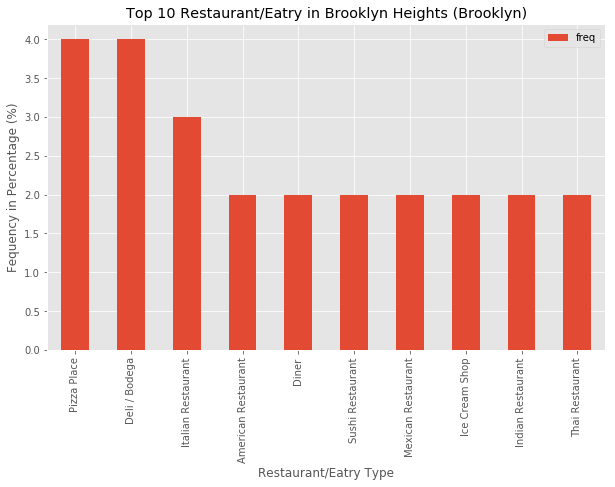

In [242]:
# step 1: import lotting libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

# step 2: plot data
top_bk.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Restaurant/Eatry Type') # add to x-label to the plot
plt.ylabel('Fequency in Percentage (%)') # add y-label to the plot
plt.title('Top 10 Restaurant/Eatry in Brooklyn Heights (Brooklyn)') # add title to the plot

plt.show()

 - #### Manhattan

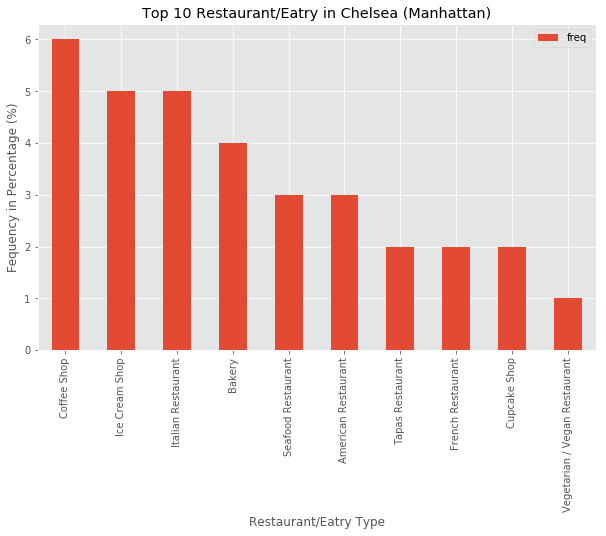

In [243]:
# plot data 
top_mn.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Restaurant/Eatry Type') # add to x-label to the plot
plt.ylabel('Fequency in Percentage (%)') # add y-label to the plot
plt.title('Top 10 Restaurant/Eatry in Chelsea (Manhattan)') # add title to the plot

plt.show()

 - #### Queens

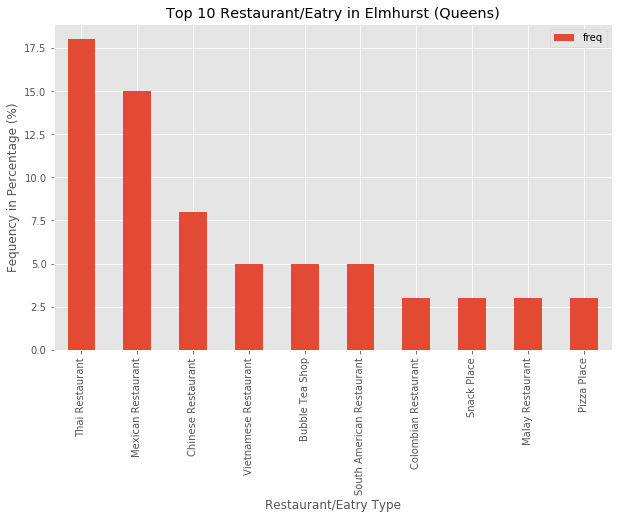

In [244]:
# plot data 
top_qu.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Restaurant/Eatry Type') # add to x-label to the plot
plt.ylabel('Fequency in Percentage (%)') # add y-label to the plot
plt.title('Top 10 Restaurant/Eatry in Elmhurst (Queens)') # add title to the plot

plt.show()

 - #### Bronx

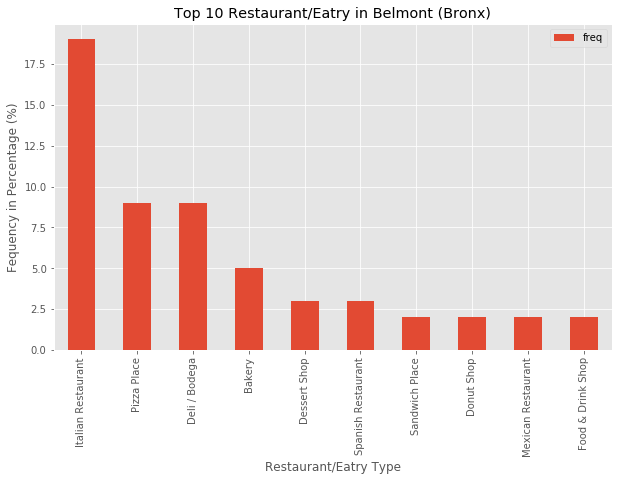

In [245]:
# plot data 
top_bx.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Restaurant/Eatry Type') # add to x-label to the plot
plt.ylabel('Fequency in Percentage (%)') # add y-label to the plot
plt.title('Top 10 Restaurant/Eatry in Belmont (Bronx)') # add title to the plot

plt.show()

 - ####  Staten Island

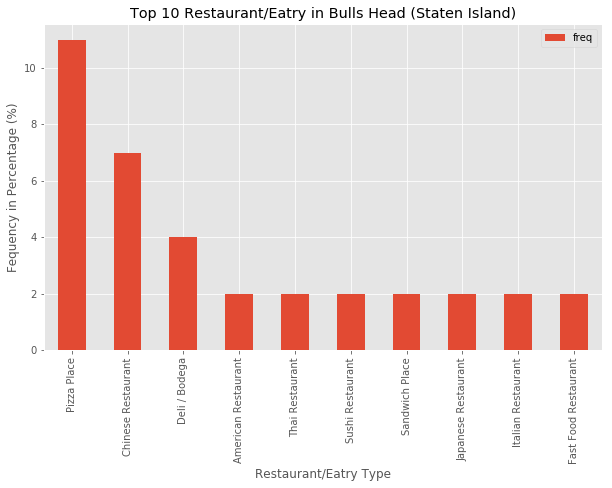

In [246]:
# plot data 
top_st.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Restaurant/Eatry Type') # add to x-label to the plot
plt.ylabel('Fequency in Percentage (%)') # add y-label to the plot
plt.title('Top 10 Restaurant/Eatry in Bulls Head (Staten Island)') # add title to the plot

plt.show()